# U.S. Migration Within and Between States

## Project Description and Aims

Originally created for 'Structure and Dynamics of Complex Networks' course, Fall 2017. 
Updated July 2019 (with new pandas skills). 

### The dataset
The data for this project is collected from the American Community Survey (ACS), the 2011-2015 collection. This data can be accessed through https://www2.census.gov/programs-surveys/acs/data/pums/2015/5-Year/ (as of 7/18/19). In Fall of 2017, I took the dataset and cleaned it, but lost the original file. It looks as though the census bureau packages data differently than it did back then, so it may be more difficult to replicate my entire project. To clean the data, I used bash scripting (because I didn't know about how easy it is to use pandas!)

### Overview
The dataset is from the American Community Survey, which asks for people's current addresses and the address they had the previous year. Each location (state, county, or non-US country) is considered a 'node', and each individual's move is an 'edge' in a networks framework. It's interesting to compare the differences between different groups moving different places.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#set the default matplotlib and seaborn settings
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [6, 4]
sns.set(style='white', palette = 'Set2')

In [71]:
#make a list of the states for ease of use
states_list = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", 
    "Colorado", "Connecticut", "Delaware", "Florida","Georgia", 
    "Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky", 
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri","Montana", "Nebraska",
    "Nevada","NewHampshire", "NewJersey","NewMexico","NewYork",
    "NorthCarolina","NorthDakota", "Ohio", "Oklahoma", "Oregon", 
    "Pennsylvania", "RhodeIsland", "SouthCarolina", "SouthDakota", 
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
    "WestVirginia", "Wisconsin", "Wyoming", "DistrictofColumbia"
]

## Flow between counties

This file contains 'from state' and 'from county', 'to state' and 'to county' as well as the distance between those two and the flow between the locations. The 'FIPS' column is the ID of the county from the original dataset which was used to lookup the county names.


The latitude and longitudes are the approximate middle of each county.


Distance was calculated from the latitude and longitude from each place using the distance formula. The unit for the distance is in latitude and longitude units squared. (Was not converted to miles or kilometers)

In [100]:
df = pd.read_csv('Data/CountyFlowsWithLatLong.txt', delim_whitespace=True)
df.head()

,from_state,from_county,from_FIPS,from_lat,from_lon,from_pop,to_state,to_county,to_FIPS,to_lat,to_long,to_pop,pop_diff,distance,flow
0,Alabama,BaldwinCounty,01003,30.6592,87.7460,191214,Alabama,AutaugaCounty,1001,32.5363,86.6444,191214,-136552,2.176471,57
1,Alabama,BarbourCounty,01005,31.8706,85.4054,26614,Alabama,AutaugaCounty,1001,32.5363,86.6444,26614,28048,1.406513,13
2,Alabama,BlountCounty,01009,33.9774,86.5672,57862,Alabama,AutaugaCounty,1001,32.5363,86.6444,57862,-3200,1.443166,5
3,Alabama,BullockCounty,01011,32.1017,85.7172,10963,Alabama,AutaugaCounty,1001,32.5363,86.6444,10963,43699,1.024000,13
4,Alabama,ButlerCounty,01013,31.7516,86.6819,20820,Alabama,AutaugaCounty,1001,32.5363,86.6444,20820,33842,0.785596,9


In [4]:
df.describe()

,from_lat,from_lon,to_FIPS,to_lat,to_long,distance,flow
count,288892.000000,288892.000000,288892.000000,288892.000000,288892.000000,288892.000000,288892.000000
mean,-12.184872,38.404228,30250.607310,28.764853,81.397621,10.021408,47.877096
std,222.687145,234.458851,15977.323937,98.000071,103.837160,12.823636,74.536242
min,-1000.000000,-1000.000000,1001.000000,-1000.000000,-1000.000000,-1.000000,1.000000
25%,33.582200,80.252100,17115.000000,34.131900,81.196900,1.750958,13.000000
50%,38.040100,86.751800,29189.000000,38.360000,87.584000,4.888218,25.000000
75%,41.340100,96.688600,45013.000000,41.660300,96.977900,13.574302,53.000000
max,80.500000,178.338000,72153.000000,80.500000,178.338000,139.869686,2673.000000


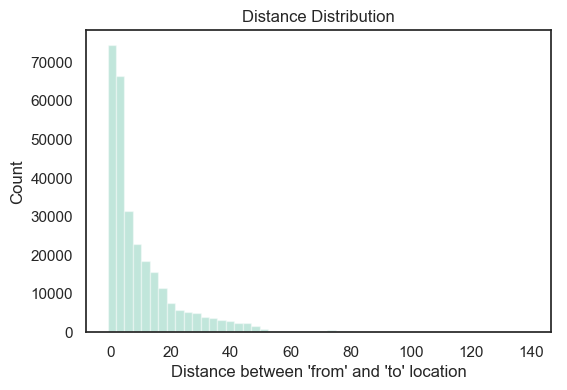

In [5]:
sns.distplot(df["distance"],
             kde=False,
            )
plt.xlabel("Distance between 'from' and 'to' location")
plt.title("Distance Distribution")
plt.ylabel('Count')
plt.show()

The majority of moves were within 20 units^2.

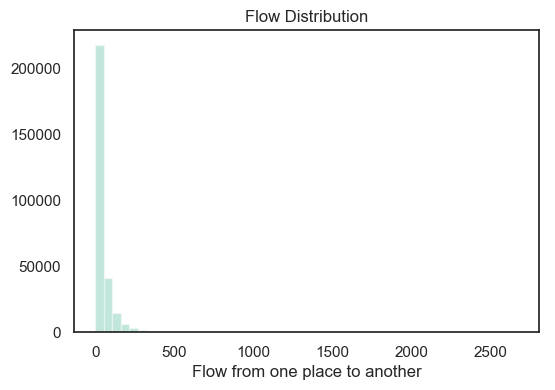

In [6]:
sns.distplot(df["flow"], kde=False
            )
plt.xlabel("Flow from one place to another")
plt.title("Flow Distribution")
#plt.ylabel('Count')
plt.show()

Some routes had as many as 2500 people, but the majority of routes only a few people traversed.

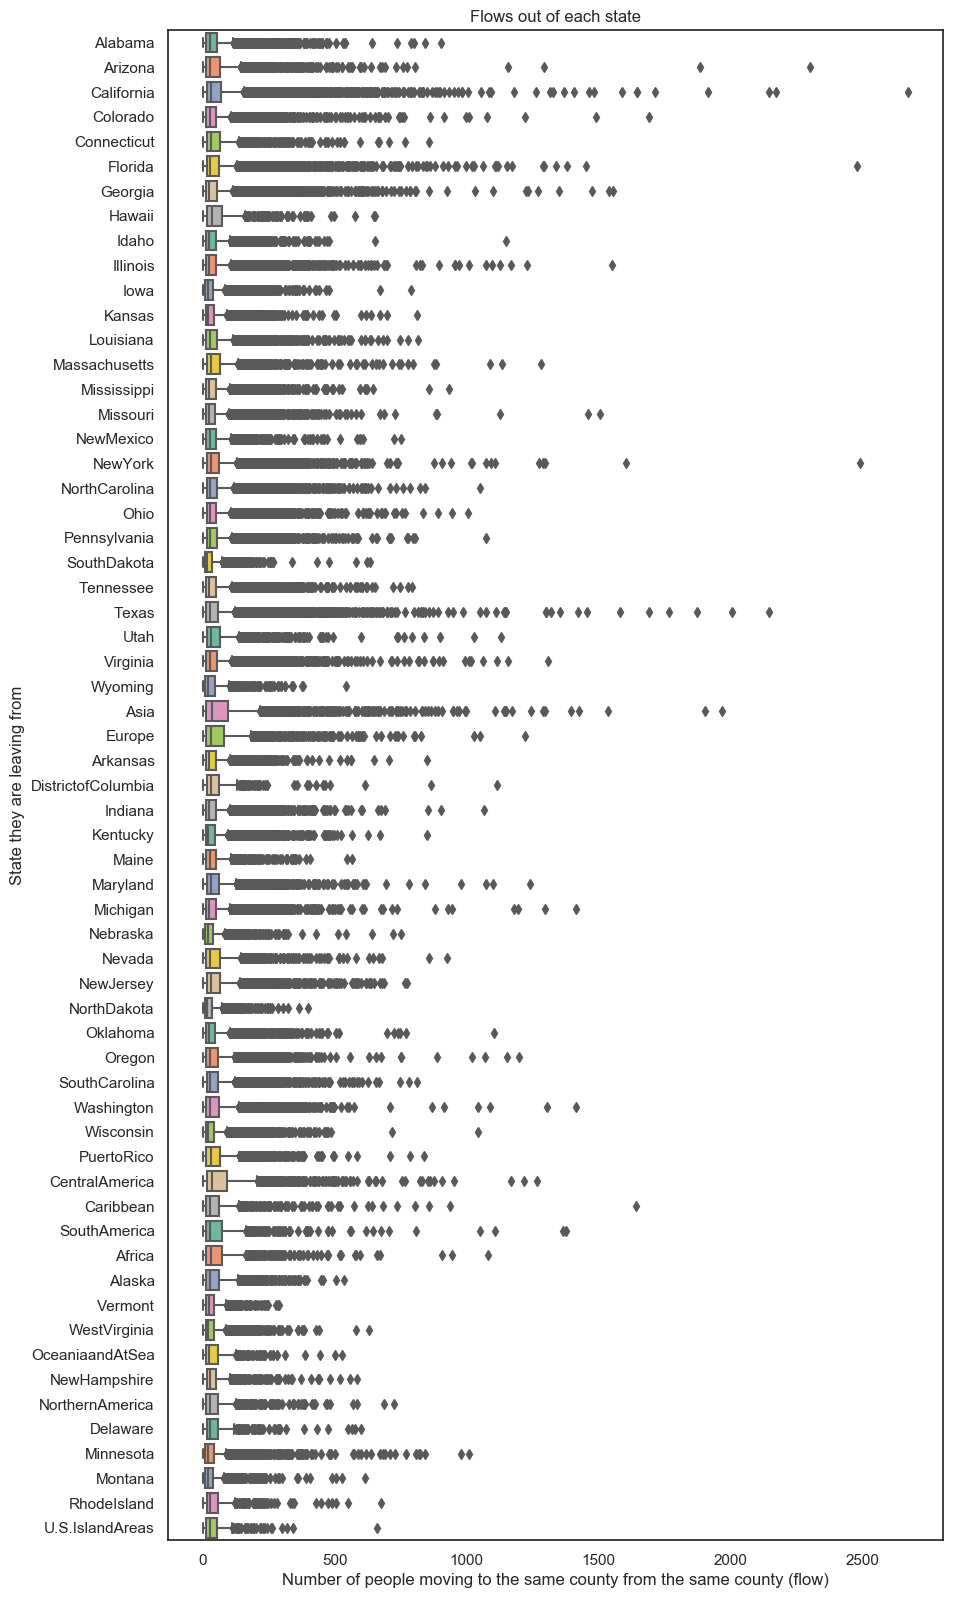

In [10]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'flow',
    y = 'from_state',
    data = df,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Flows out of each state')
ax.set_ylabel('State they are leaving from')
ax.set_xlabel('Number of people moving to the same county from the same county (flow)')
plt.show()

This massive graph is showing us that the flow is centered in small chunks for most state / regions, with a few routes that are very popular. From Connecticut, California, and New York, for example, there are up to 2000 people moving from the same county to another county.

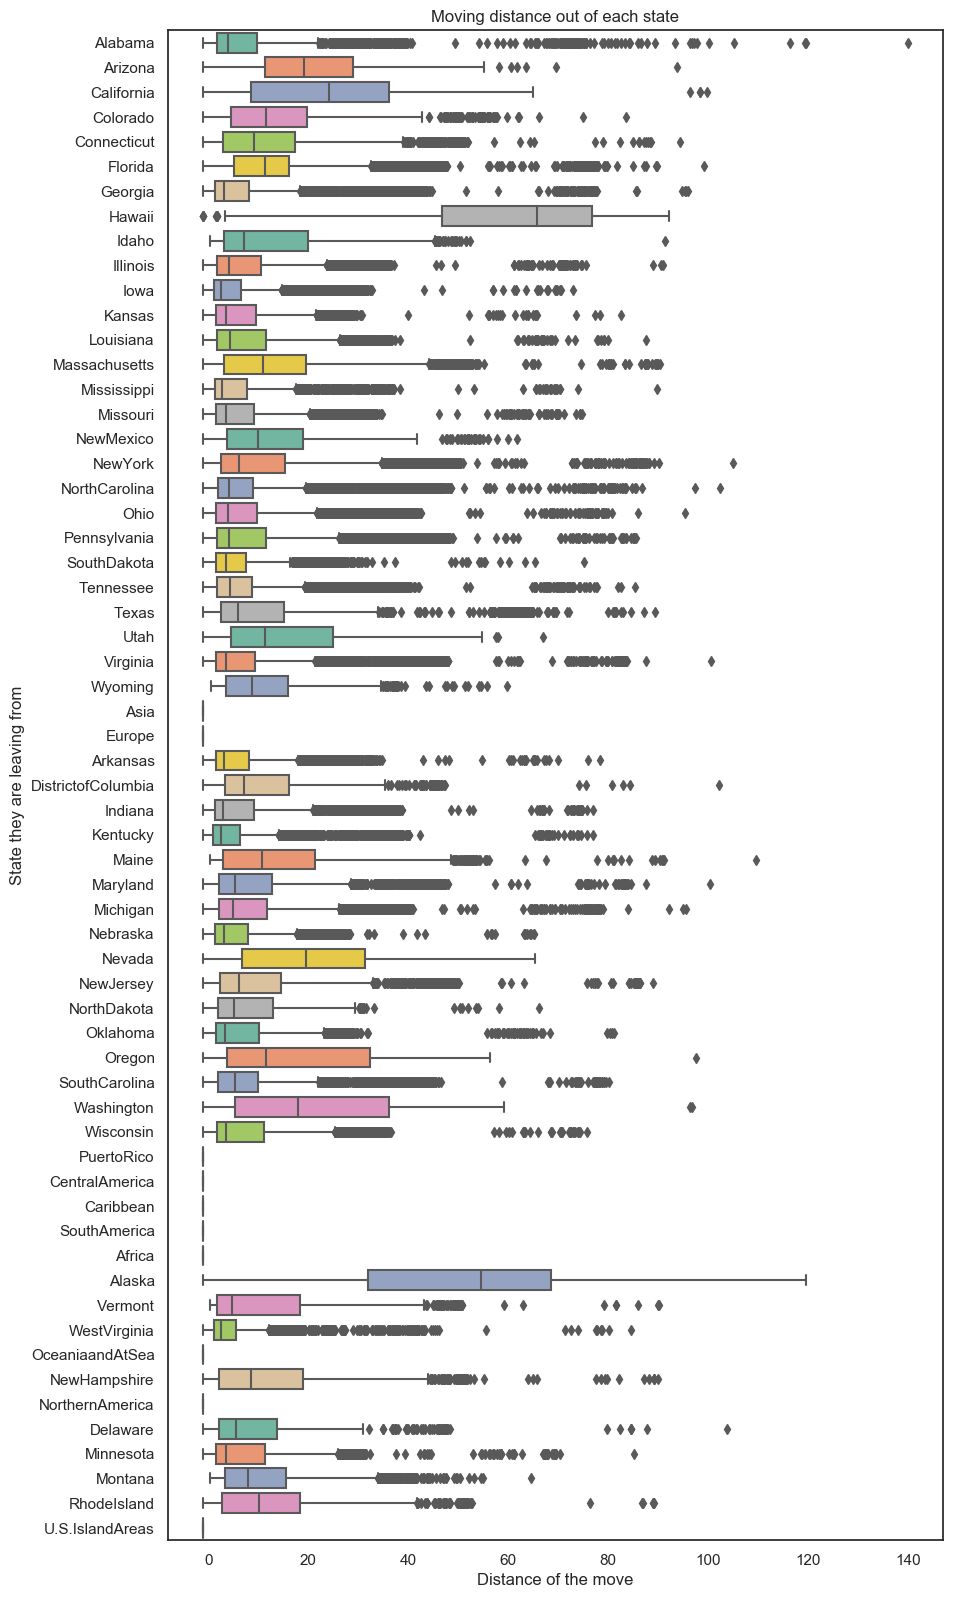

In [17]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'distance',
    y = 'from_state',
    data = df,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Moving distance out of each state')
ax.set_ylabel('State they are leaving from')
ax.set_xlabel('Distance of the move')
plt.show()

Unsurprisingly, Hawaii and Alaska have much bigger distributions of moves, since they are so far away. The out-of-the-US regions have no data available for distance, since they are entire regions of the world (so all of their distances were set to -1)

### Average furthest and shortest distance states

In [45]:
df_no_outside = df[df['distance']>0]
median_distance = df_no_outside.groupby('from_state')['distance'].median().sort_values(ascending=False)
top_five = median_distance.iloc[0:5].index.values
bottom_five = median_distance.iloc[-6:-1].index.values
print('The five states with the furthest median distance are:', top_five)
print('The five states with the shortest median distance are:',bottom_five)

The five states with the furthest median distance are: ['Hawaii' 'Alaska' 'California' 'Nevada' 'Arizona']
The five states with the shortest median distance are: ['Georgia' 'Indiana' 'Mississippi' 'Iowa' 'Kentucky']


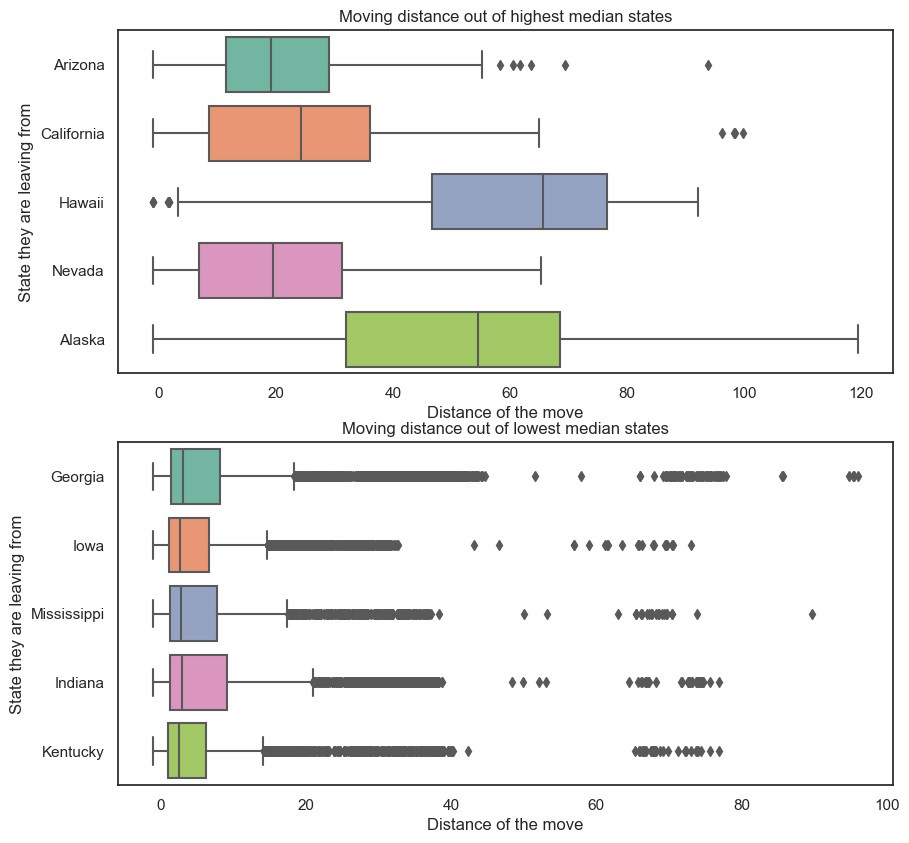

In [57]:
top5df = df[ df['from_state'].isin(top_five)]
bottom5df = df[df['from_state'].isin(bottom_five)]

fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.boxplot(
    x = 'distance',
    y = 'from_state',
    data = top5df,
    palette = 'Set2',
    ax = ax[0],
)
ax[0].set_title('Moving distance out of highest median states')
ax[0].set_ylabel('State they are leaving from')
ax[0].set_xlabel('Distance of the move')

sns.boxplot(
    x = 'distance',
    y = 'from_state',
    data = bottom5df,
    palette = 'Set2',
    ax = ax[1],
)

ax[1].set_title('Moving distance out of lowest median states')
ax[1].set_ylabel('State they are leaving from')
ax[1].set_xlabel('Distance of the move')
plt.show()

Even though the median distance of moves are higher in the top states, the overall distribution for the lowest median distance states still have a lot of longer/further outliers.

## Movement in/out of states

Which states draw the most people from out of state? Which states have most people leaving the state?

In [70]:
out_of_state = df[ df['from_state'] != df['to_state']]
in_state = df[ df['from_state'] == df['to_state']]

#filter out the international moves
out_of_state = out_of_state[ out_of_state['from_state'].isin(states_list) ]
in_state = in_state[ in_state['from_state'].isin(states_list) ]

print(out_of_state.shape[0],'moves were to another state')
print(in_state.shape[0], 'moves were to another county in the same state')

196314 moves were to another state
92578 moves were to another county in the same state
184073 moves were to another state
90915 moves were to another county in the same state


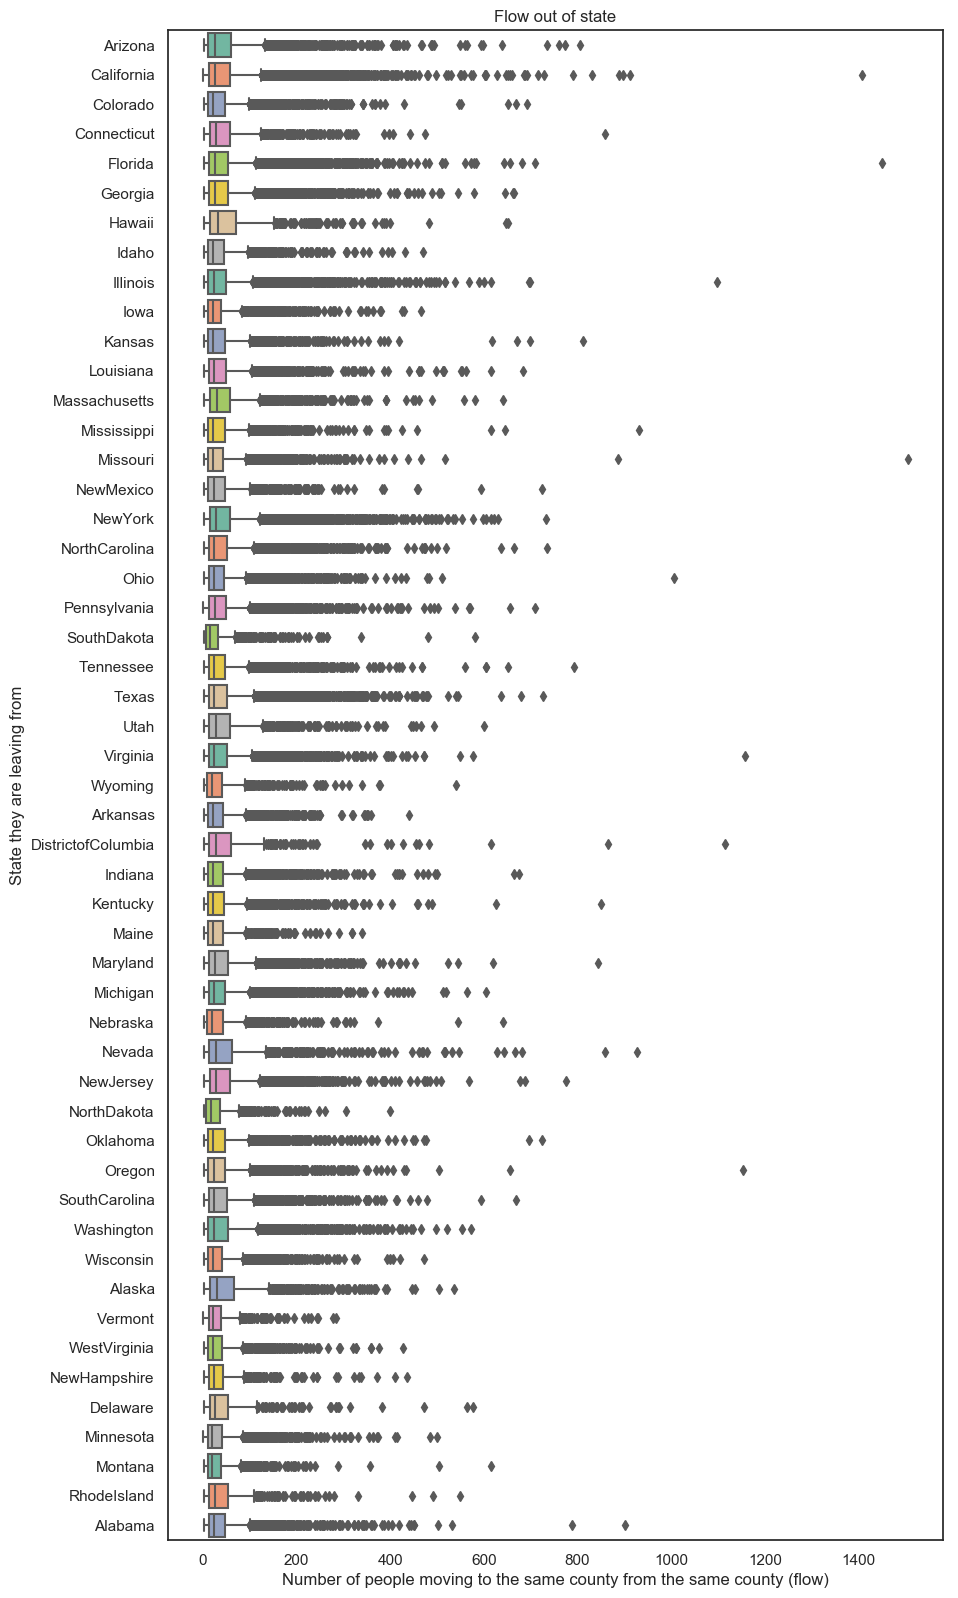

In [81]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'flow',
    y = 'from_state',
    data = out_of_state,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Flow out of state')
ax.set_ylabel('State they are leaving from')
ax.set_xlabel('Number of people moving to the same county from the same county (flow)')
plt.show()

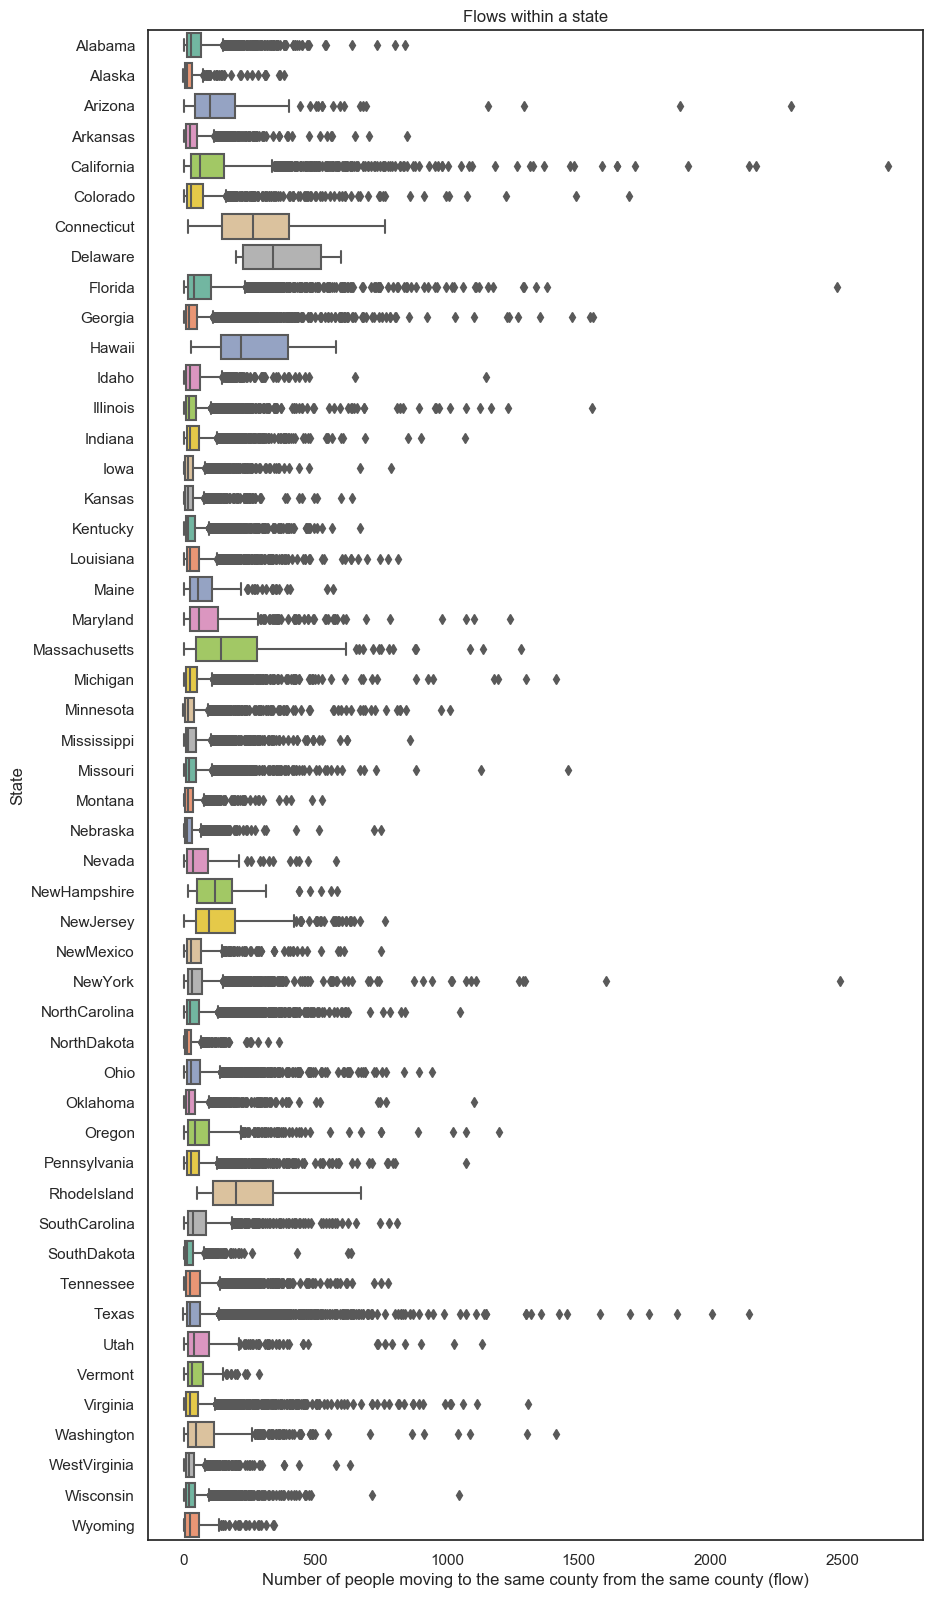

In [82]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'flow',
    y = 'from_state',
    data = in_state,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Flows within a state')
ax.set_ylabel('State')
ax.set_xlabel('Number of people moving to the same county from the same county (flow)')
plt.show()

As could probably be expected, there are certain routes in California, Texas, and New York that are very popular.

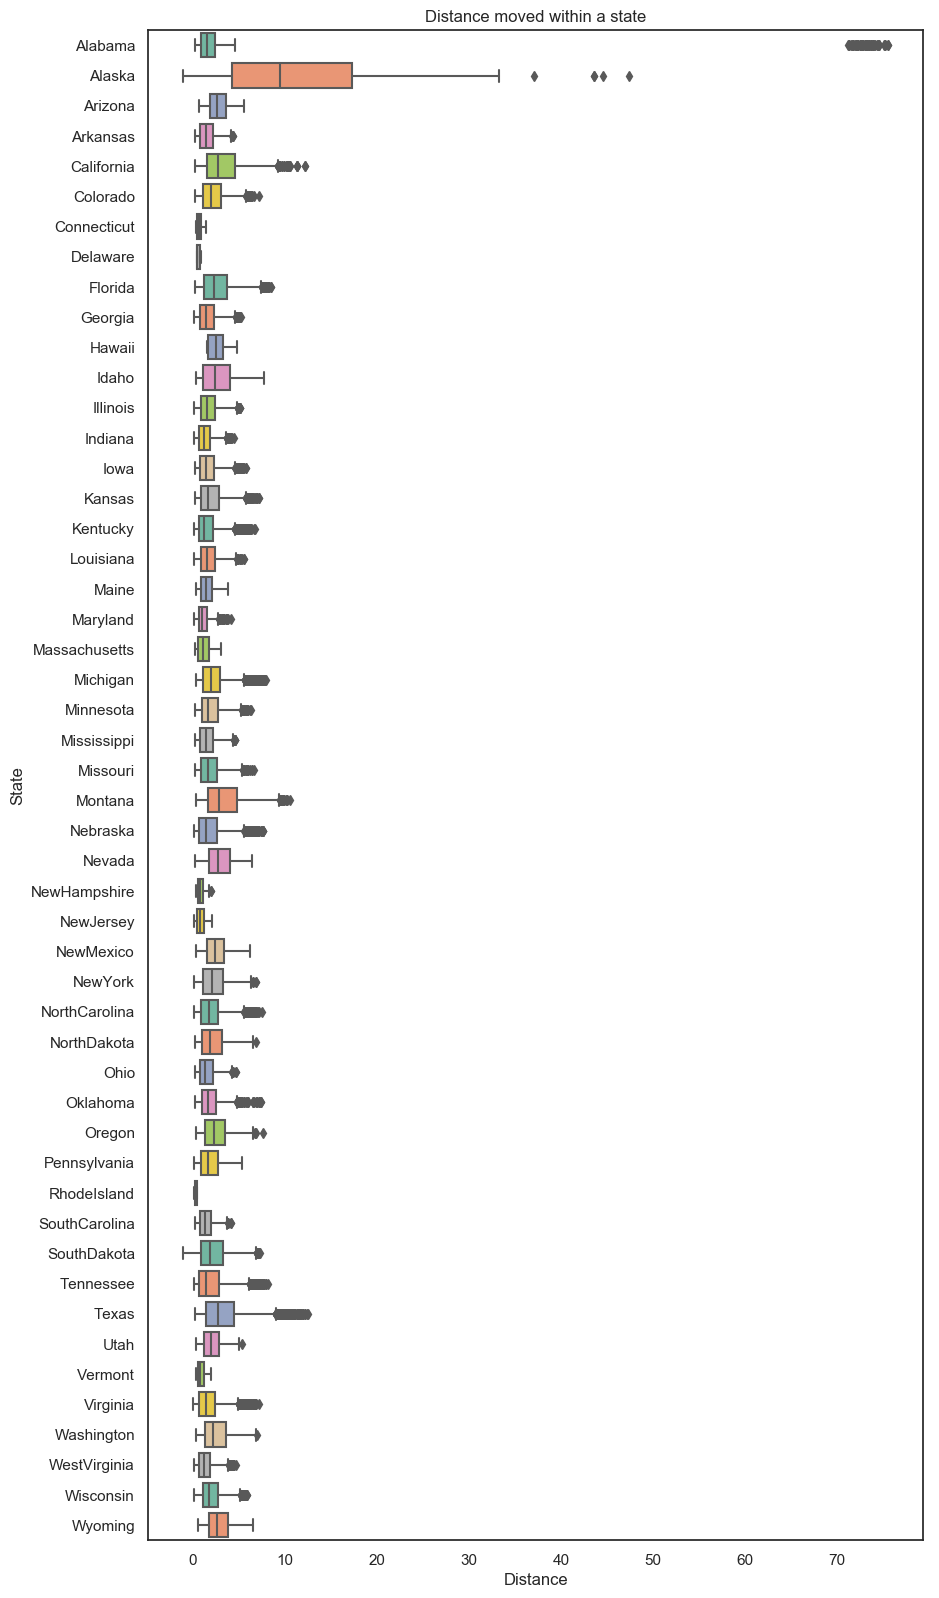

In [84]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'distance',
    y = 'from_state',
    data = in_state,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Distance moved within a state')
ax.set_ylabel('State')
ax.set_xlabel('Distance')
plt.show()

We probably would have expected that the bigger states would have further distances moved between counties in the state. It looks instead like alabama has some sort of huge outlier.

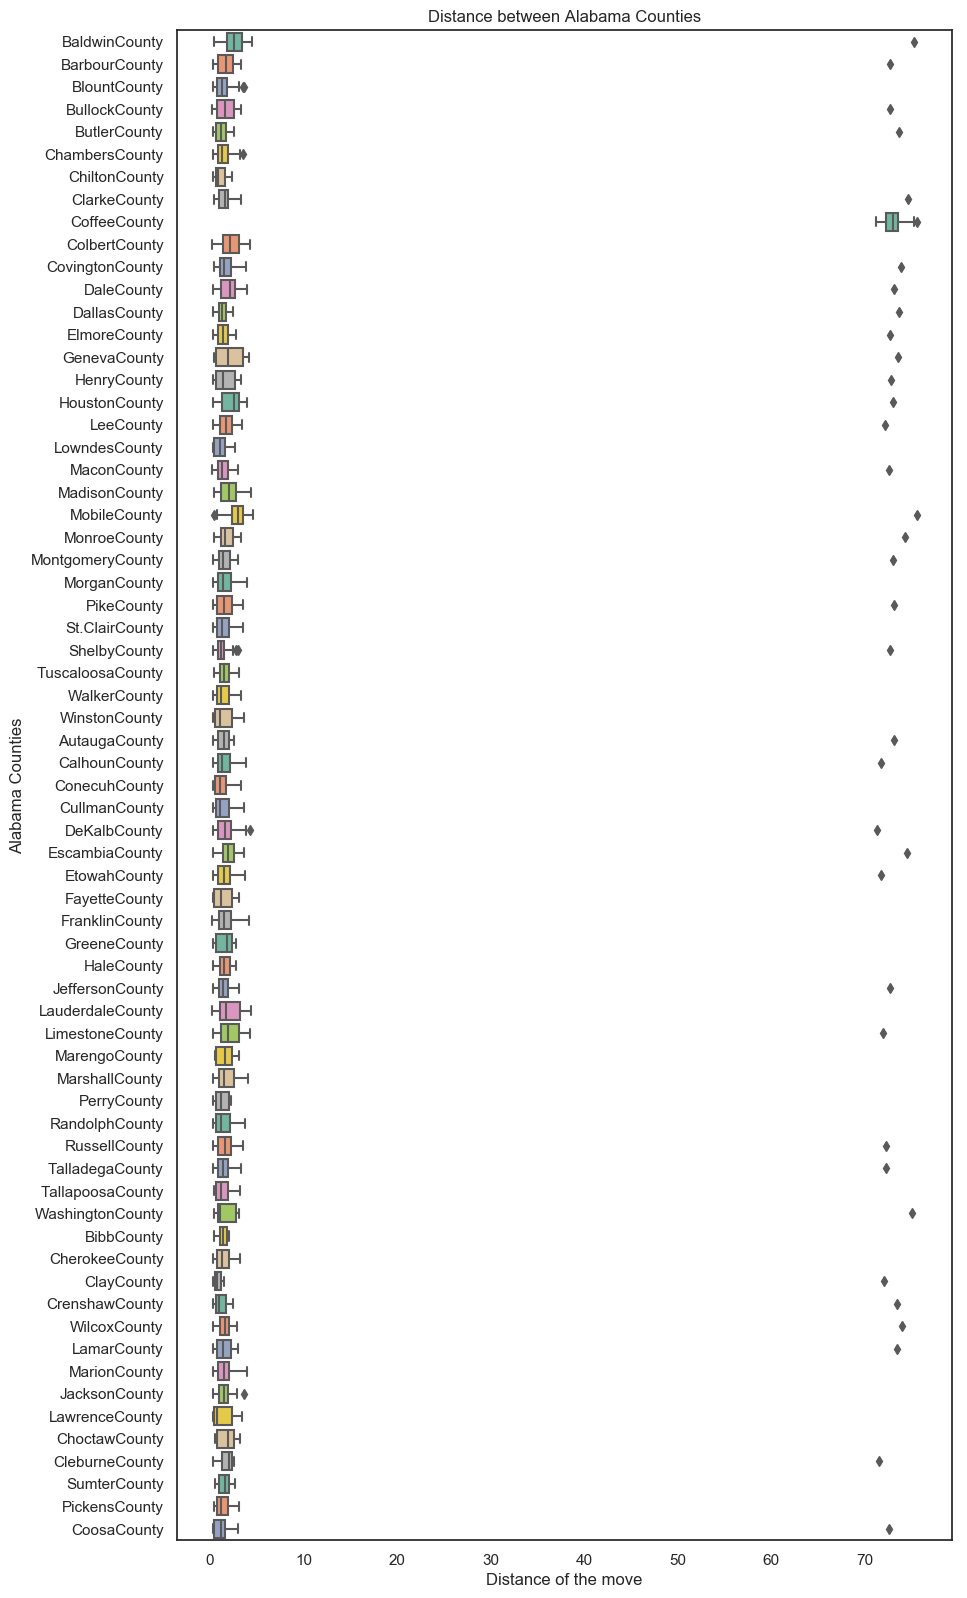

In [85]:
alabama = in_state[ in_state['from_state'] == 'Alabama']
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'distance',
    y = 'from_county',
    data = alabama,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Distance between Alabama Counties')
ax.set_ylabel('Alabama Counties')
ax.set_xlabel('Distance of the move')
plt.show()

Looks like there's one county in Alabama, Coffee County, that is a big outlier. According to some research, Coffee county is about in the middle of the state, not in an island somewhere, so maybe the latitude and longitude for this county was misentered.

In [104]:
coffeecounty = df[ (df['from_county']=='CoffeeCounty') | (df['to_county']=='CoffeeCounty') ]
coffeecounty.head(15)

,from_state,from_county,from_FIPS,from_lat,from_lon,from_pop,to_state,to_county,to_FIPS,to_lat,to_long,to_pop,pop_diff,distance,flow
576,Georgia,CoffeeCounty,13069,31.5492,82.8449,43039,Alabama,CalhounCounty,1015,33.7717,85.8225,43039,72237,3.715590,36
2591,Tennessee,CoffeeCounty,47031,35.4887,86.0782,51578,Alabama,JeffersonCounty,1073,33.5534,86.8965,51578,598732,2.101190,18
3002,Tennessee,CoffeeCounty,47031,35.4887,86.0782,51578,Alabama,LeeCounty,1081,32.6040,85.3530,51578,97720,2.974459,47
3101,Tennessee,CoffeeCounty,47031,35.4887,86.0782,51578,Alabama,LimestoneCounty,1083,34.8102,86.9814,51578,36392,1.129660,21
29352,Tennessee,CoffeeCounty,47031,35.4887,86.0782,51578,Colorado,ElPasoCounty,8041,38.8273,104.5270,51578,594664,18.748453,75
36600,Tennessee,CoffeeCounty,47031,35.4887,86.0782,51578,Florida,BrevardCounty,12009,28.2982,80.7003,51578,496740,8.979148,253
38166,Georgia,CoffeeCounty,13069,31.5492,82.8449,43039,Florida,ColumbiaCounty,12023,30.2213,82.6231,43039,24018,1.346296,156
38470,Georgia,CoffeeCounty,13069,31.5492,82.8449,43039,Florida,DuvalCounty,12031,30.3352,81.6481,43039,835568,1.704736,36
38954,Georgia,CoffeeCounty,13069,31.5492,82.8449,43039,Florida,EscambiaCounty,12033,30.6116,87.3390,43039,259384,4.590864,14
39969,Georgia,CoffeeCounty,13069,31.5492,82.8449,43039,Florida,HendryCounty,12051,26.5393,81.1515,43039,-5276,5.288355,49


Looks like the latitude and longitude for Coffee County, Alabama were transposed, leading to incorrect distances! We'll remove those from the dataset.

In [103]:
df = df[ ~((df['from_state']=='Alabama') & (df['from_county'] == 'CoffeeCounty')) &
       ~((df['to_state']=='Alabama') & (df['to_county'] == 'CoffeeCounty'))
       ]

In [105]:
#redo getting within and out of state moves
out_of_state = df[ df['from_state'] != df['to_state']]
in_state = df[ df['from_state'] == df['to_state']]

#filter out the international moves
out_of_state = out_of_state[ out_of_state['from_state'].isin(states_list) ]
in_state = in_state[ in_state['from_state'].isin(states_list) ]

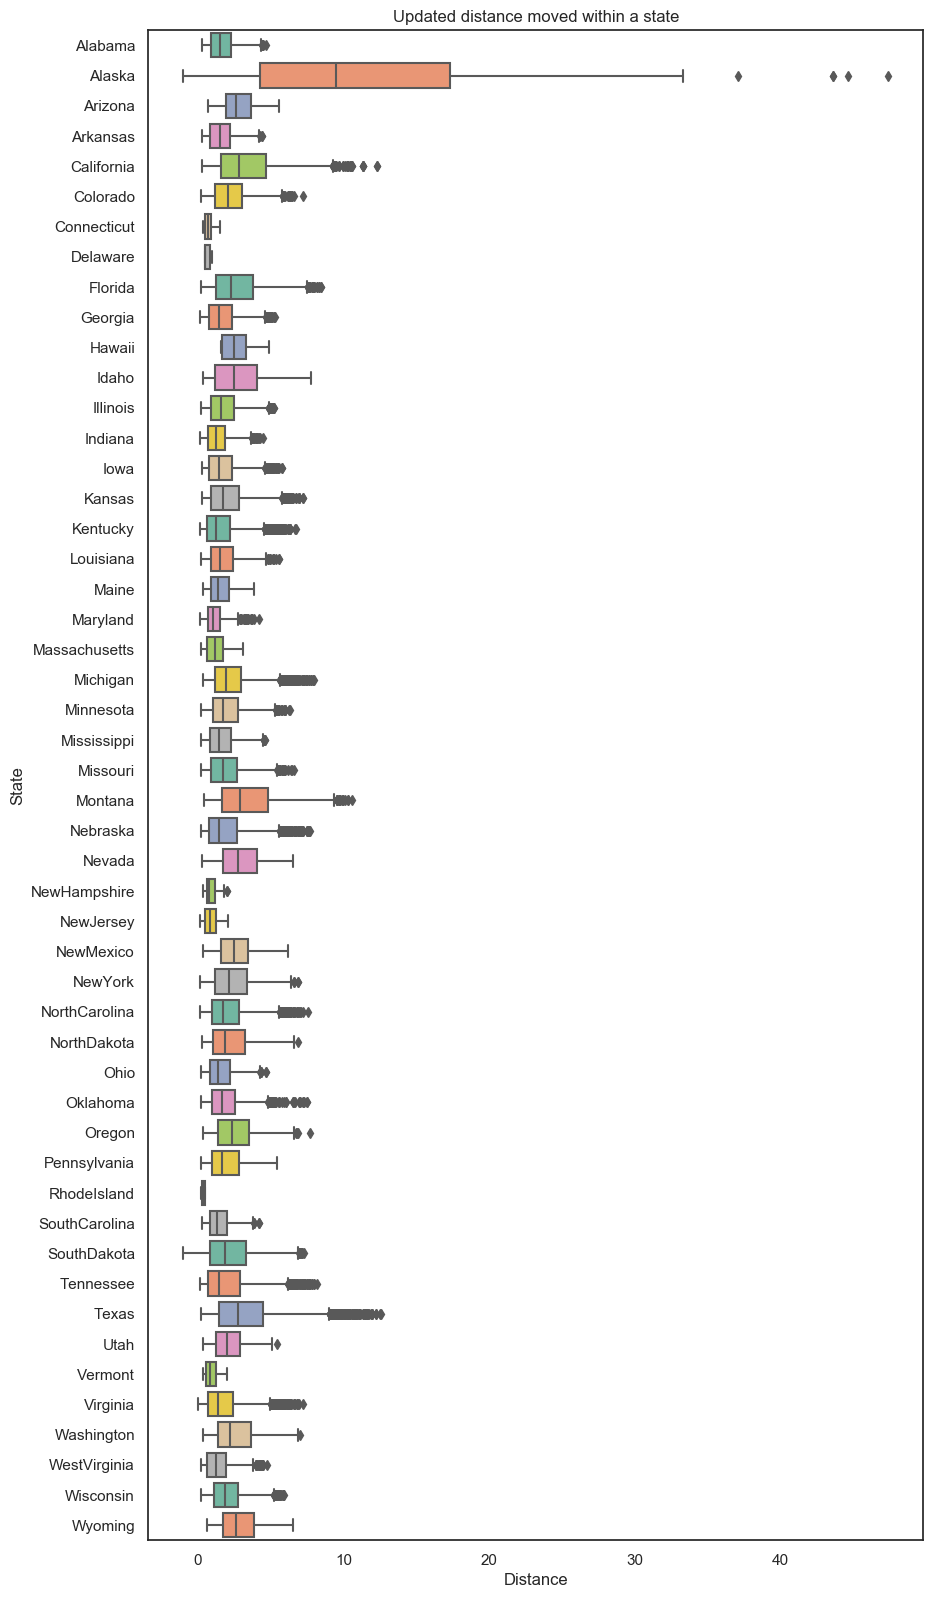

In [106]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'distance',
    y = 'from_state',
    data = in_state,
    palette = 'Set2',
    ax = ax,
)
ax.set_title('Updated distance moved within a state')
ax.set_ylabel('State')
ax.set_xlabel('Distance')
plt.show()

Alaska having the widest range of within-state move distances makes sense since it's so big. Rhode Island has a very small distribution, which also makes sense since it's so small.

## Flow By Age
The age groups were pre-established in the dataset, with 15 categories. 
"1 to 4 years", 
"5 to 17 years", 
"18 to 19 years", 
"20 to 24 years", 
"25 to 29 years", 
"30 to 34 years", 
"35 to 39 years", 
"40 to 44 years", 
"45 to 49 years", 
"50 to 54 years", 
"55 to 59 years", 
"60 to 64 years", 
"65 to 69 years", 
"70 to 74 years", 
"75 years and over"

In [110]:
age_keys = {
    '01':"1 to 4 years", '02':"5 to 17 years", '03':"18 to 19 years", '04':"20 to 24 years", '05':"25 to 29 years", 
    '06':"30 to 34 years", '07':"35 to 39 years", '08':"40 to 44 years", '09':"45 to 49 years", '10':"50 to 54 years", 
    '11':"55 to 59 years", '12': "60 to 64 years", '13':"65 to 69 years", '14':"70 to 74 years", '15':"75 years and over"
}


dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15'])

### Preprocessing the dataset

Load in the data (from the separate files)

In [146]:
all_ages_df = pd.DataFrame()

for agegroup in age_keys:
    filename = f'Data/by_age_group/age_{agegroup}_edges.txt'
    age_df = pd.read_csv(filename, delimiter = ';')
    age_df['age_cat'] = age_keys[agegroup]
    all_ages_df = pd.concat([all_ages_df, age_df], axis=0)
    
all_ages_df = all_ages_df.drop(columns=['Unnamed: 8'])
all_ages_df.head()

,fromFIPS,toFIPS,flow,weightedflow,distance,popdiff,fromname,toname,age_cat
0,01051,1001,108,27.6568501921,0.505383,-3.08707120591,"ElmoreCounty, Alabama","AutaugaCounty, Alabama",1 to 4 years
1,01039,1003,7,3.90189520624,1.422976,3.80407124889,"CovingtonCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
2,01073,1003,9,0.262107930221,3.016296,-4.41787009808,"JeffersonCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
3,01095,1003,40,7.6379606645,3.918368,3.46627432179,"MarshallCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
4,01097,1003,138,6.08734009704,0.451210,-4.16157761105,"MobileCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years


In [147]:
all_ages_df.columns

Index(['fromFIPS', ' toFIPS', ' flow', ' weightedflow', ' distance',
       ' popdiff', ' fromname', ' toname', 'age_cat'],
      dtype='object')

^ Some of the column names have accidental spaces in front.

Remove the flows from out of the country

In [148]:
#remove flows from out of the country, which have population difference of 200 automatically
all_ages_df = all_ages_df[ all_ages_df[' distance'] < 200]
all_ages_df.head(15)

,fromFIPS,toFIPS,flow,weightedflow,distance,popdiff,fromname,toname,age_cat
0,01051,1001,108,27.6568501921,0.505383,-3.08707120591,"ElmoreCounty, Alabama","AutaugaCounty, Alabama",1 to 4 years
1,01039,1003,7,3.90189520624,1.422976,3.80407124889,"CovingtonCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
2,01073,1003,9,0.262107930221,3.016296,-4.41787009808,"JeffersonCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
3,01095,1003,40,7.6379606645,3.918368,3.46627432179,"MarshallCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
4,01097,1003,138,6.08734009704,0.451210,-4.16157761105,"MobileCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years
5,12033,1003,12,0.81113965121,0.409774,-3.82157902791,"EscambiaCounty, Florida","BaldwinCounty, Alabama",1 to 4 years
6,22019,1003,6,0.550711335475,5.628427,-3.43648069501,"CalcasieuParish, Louisiana","BaldwinCounty, Alabama",1 to 4 years
8,01069,1005,11,2.10365270606,0.720804,-3.60129931019,"HoustonCounty, Alabama","BarbourCounty, Alabama",1 to 4 years
9,01081,1005,6,0.855675984027,0.735270,-3.76162718456,"LeeCounty, Alabama","BarbourCounty, Alabama",1 to 4 years
10,13239,1005,13,500.0,0.396207,3.08278537032,"QuitmanCounty, Georgia","BarbourCounty, Alabama",1 to 4 years


The weighted flow is equivalent to the number of people leaving the county per 1000 people. "weighted flow is calculated from the flow divided by the amount of people in the source; 
The idea is that probably more people (in general) would leave a big city (because there are more people there); equivalent to FLOW PER 1000 PEOPLE " (from 2017 notes, when this column was calculated)

In [149]:
def get_county(name):
    place = name.split(',')
    return place[0]
def get_state(name):
    place = name.split(',')
    return place[1]

def split_county_states(df):
    df['from_state'] = df[' fromname'].apply(get_state)
    df['from_county'] = df[' fromname'].apply(get_county)
    df['to_state'] = df[' toname'].apply(get_state)
    df['to_county'] = df[' toname'].apply(get_county)
    return df
all_ages_df = split_county_states(all_ages_df)
all_ages_df.head(15)

,fromFIPS,toFIPS,flow,weightedflow,distance,popdiff,fromname,toname,age_cat,from_state,from_county,to_state,to_county
0,01051,1001,108,27.6568501921,0.505383,-3.08707120591,"ElmoreCounty, Alabama","AutaugaCounty, Alabama",1 to 4 years,Alabama,ElmoreCounty,Alabama,AutaugaCounty
1,01039,1003,7,3.90189520624,1.422976,3.80407124889,"CovingtonCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years,Alabama,CovingtonCounty,Alabama,BaldwinCounty
2,01073,1003,9,0.262107930221,3.016296,-4.41787009808,"JeffersonCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years,Alabama,JeffersonCounty,Alabama,BaldwinCounty
3,01095,1003,40,7.6379606645,3.918368,3.46627432179,"MarshallCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years,Alabama,MarshallCounty,Alabama,BaldwinCounty
4,01097,1003,138,6.08734009704,0.451210,-4.16157761105,"MobileCounty, Alabama","BaldwinCounty, Alabama",1 to 4 years,Alabama,MobileCounty,Alabama,BaldwinCounty
5,12033,1003,12,0.81113965121,0.409774,-3.82157902791,"EscambiaCounty, Florida","BaldwinCounty, Alabama",1 to 4 years,Florida,EscambiaCounty,Alabama,BaldwinCounty
6,22019,1003,6,0.550711335475,5.628427,-3.43648069501,"CalcasieuParish, Louisiana","BaldwinCounty, Alabama",1 to 4 years,Louisiana,CalcasieuParish,Alabama,BaldwinCounty
8,01069,1005,11,2.10365270606,0.720804,-3.60129931019,"HoustonCounty, Alabama","BarbourCounty, Alabama",1 to 4 years,Alabama,HoustonCounty,Alabama,BarbourCounty
9,01081,1005,6,0.855675984027,0.735270,-3.76162718456,"LeeCounty, Alabama","BarbourCounty, Alabama",1 to 4 years,Alabama,LeeCounty,Alabama,BarbourCounty
10,13239,1005,13,500.0,0.396207,3.08278537032,"QuitmanCounty, Georgia","BarbourCounty, Alabama",1 to 4 years,Georgia,QuitmanCounty,Alabama,BarbourCounty


Now remove all those extra columns

In [158]:
ages_df = pd.DataFrame()
ages_df['age_cat'] = all_ages_df['age_cat']
ages_df['flow'] = all_ages_df[' flow']
ages_df['from_state'] = all_ages_df['from_state']
ages_df['from_county'] = all_ages_df['from_county']
ages_df['distance'] = all_ages_df[' distance']
ages_df['to_state'] = all_ages_df['to_state']
ages_df['to_county'] = all_ages_df['to_county']
ages_df['weighted_flow'] = all_ages_df[' weightedflow'].apply(float)
ages_df['popdiff'] = all_ages_df[' popdiff'].apply(float)
ages_df.head(15)

,age_cat,flow,from_state,from_county,distance,to_state,to_county,weighted_flow,popdiff
0,1 to 4 years,108,Alabama,ElmoreCounty,0.505383,Alabama,AutaugaCounty,27.656850,-3.087071
1,1 to 4 years,7,Alabama,CovingtonCounty,1.422976,Alabama,BaldwinCounty,3.901895,3.804071
2,1 to 4 years,9,Alabama,JeffersonCounty,3.016296,Alabama,BaldwinCounty,0.262108,-4.417870
3,1 to 4 years,40,Alabama,MarshallCounty,3.918368,Alabama,BaldwinCounty,7.637961,3.466274
4,1 to 4 years,138,Alabama,MobileCounty,0.451210,Alabama,BaldwinCounty,6.087340,-4.161578
5,1 to 4 years,12,Florida,EscambiaCounty,0.409774,Alabama,BaldwinCounty,0.811140,-3.821579
6,1 to 4 years,6,Louisiana,CalcasieuParish,5.628427,Alabama,BaldwinCounty,0.550711,-3.436481
8,1 to 4 years,11,Alabama,HoustonCounty,0.720804,Alabama,BarbourCounty,2.103653,-3.601299
9,1 to 4 years,6,Alabama,LeeCounty,0.735270,Alabama,BarbourCounty,0.855676,-3.761627
10,1 to 4 years,13,Georgia,QuitmanCounty,0.396207,Alabama,BarbourCounty,500.000000,3.082785


In [159]:
ages_df.groupby('age_cat').describe()

flow                                                 \
                     count       mean         std  min   25%   50%    75%   
age_cat                                                                     
1 to 4 years       19889.0  38.121625   87.995875  1.0   9.0  18.0  38.00   
18 to 19 years     34240.0  34.632798   75.787209  1.0   9.0  17.0  33.00   
20 to 24 years     44574.0  48.395679  122.528495  1.0  10.0  20.0  45.00   
25 to 29 years     37769.0  49.460245  149.780539  1.0   9.0  20.0  43.00   
30 to 34 years     31072.0  41.370237  118.993019  1.0   8.0  17.0  37.00   
35 to 39 years     25314.0  33.861539   86.730042  1.0   8.0  15.0  32.00   
40 to 44 years     22730.0  30.489397   70.638276  1.0   7.0  14.0  29.75   
45 to 49 years     21012.0  28.136779   61.946635  1.0   7.0  14.0  28.00   
5 to 17 years      30987.0  48.665699  134.108472  1.0   8.0  19.0  46.00   
50 to 54 years     20607.0  26.420488   56.917018  1.0   7.0  13.0  26.00   
55 to 59 years     18489.0  23.974093   47.415140  1.0   7.0  13.0  25.00   
60 to 64 years     15752.0  22.529584   41.173069  1.0   7.0  12.0  24.00   
65 to 69 years     11754.0  20.039136   30.534692  1.0   6.0  12.0  22.00   
70 to 74 years      8436.0  18.383476   25.461736  1.0   7.0  12.0  21.00   
75 years and over  14463.0  23.270345   40.402760  1.0   7.0  13.0  25.00   

                          distance            ... weighted_flow              \
                      max    count      mean  ...           75%         max   
age_cat                                       ...                             
1 to 4 years       3727.0  19889.0  6.858963  ...      6.336355  500.000000   
18 to 19 years     3031.0  34240.0  6.431118  ...     10.662467  884.615385   
20 to 24 years     5219.0  44574.0  6.942955  ...      5.492473  666.666667   
25 to 29 years     6809.0  37769.0  7.276770  ...      5.482648  596.385542   
30 to 34 years     4851.0  31072.0  7.033760  ...      4.585187  277.108434   
35 to 39 years     2948.0  25314.0  6.656103  ...      4.333932  541.353383   
40 to 44 years     2620.0  22730.0  6.255474  ...      3.802281  461.538462   
45 to 49 years     2215.0  21012.0  5.851063  ...      3.430102  380.614657   
5 to 17 years      7047.0  30987.0  6.312444  ...      2.280360  176.165803   
50 to 54 years     2134.0  20607.0  5.770955  ...      3.034171  226.666667   
55 to 59 years     1630.0  18489.0  5.949016  ...      2.680965  287.128713   
60 to 64 years     1408.0  15752.0  5.874836  ...      2.741765  155.913978   
65 to 69 years      754.0  11754.0  5.805430  ...      2.936283  370.370370   
70 to 74 years      582.0   8436.0  5.550487  ...      4.050558  212.435233   
75 years and over  1043.0  14463.0  5.096152  ...      3.364102  548.387097   

                   popdiff                                                    \
                     count      mean       std       min       25%       50%   
age_cat                                                                        
1 to 4 years       19889.0 -0.235461  4.106285 -5.722405 -4.191479 -2.574031   
18 to 19 years     34240.0  0.036069  3.888158 -5.460105 -3.962582  2.178977   
20 to 24 years     44574.0 -0.065981  4.272865 -5.886920 -4.321619 -2.187521   
25 to 29 years     37769.0 -0.143176  4.286727 -5.898785 -4.340008 -2.481443   
30 to 34 years     31072.0 -0.258174  4.256446 -5.874463 -4.353844 -2.723866   
35 to 39 years     25314.0 -0.276018  4.212200 -5.843595 -4.317677 -2.743901   
40 to 44 years     22730.0 -0.323396  4.212528 -5.856754 -4.338770 -2.838849   
45 to 49 years     21012.0 -0.308492  4.209838 -5.847053 -4.334735 -2.837273   
5 to 17 years      30987.0 -0.278096  4.592848 -6.226725 -4.698496 -3.129690   
50 to 54 years     20607.0 -0.355607  4.230559 -5.836190 -4.368026 -2.958564   
55 to 59 years     18489.0 -0.377063  4.214225 -5.787171 -4.366628 -2.971276   
60 to 64 years     15752.0 -0.409940  4.166871 -5.705222 -4.340310 -2.985875   
65 to 69 yea

### Distances moved by age group

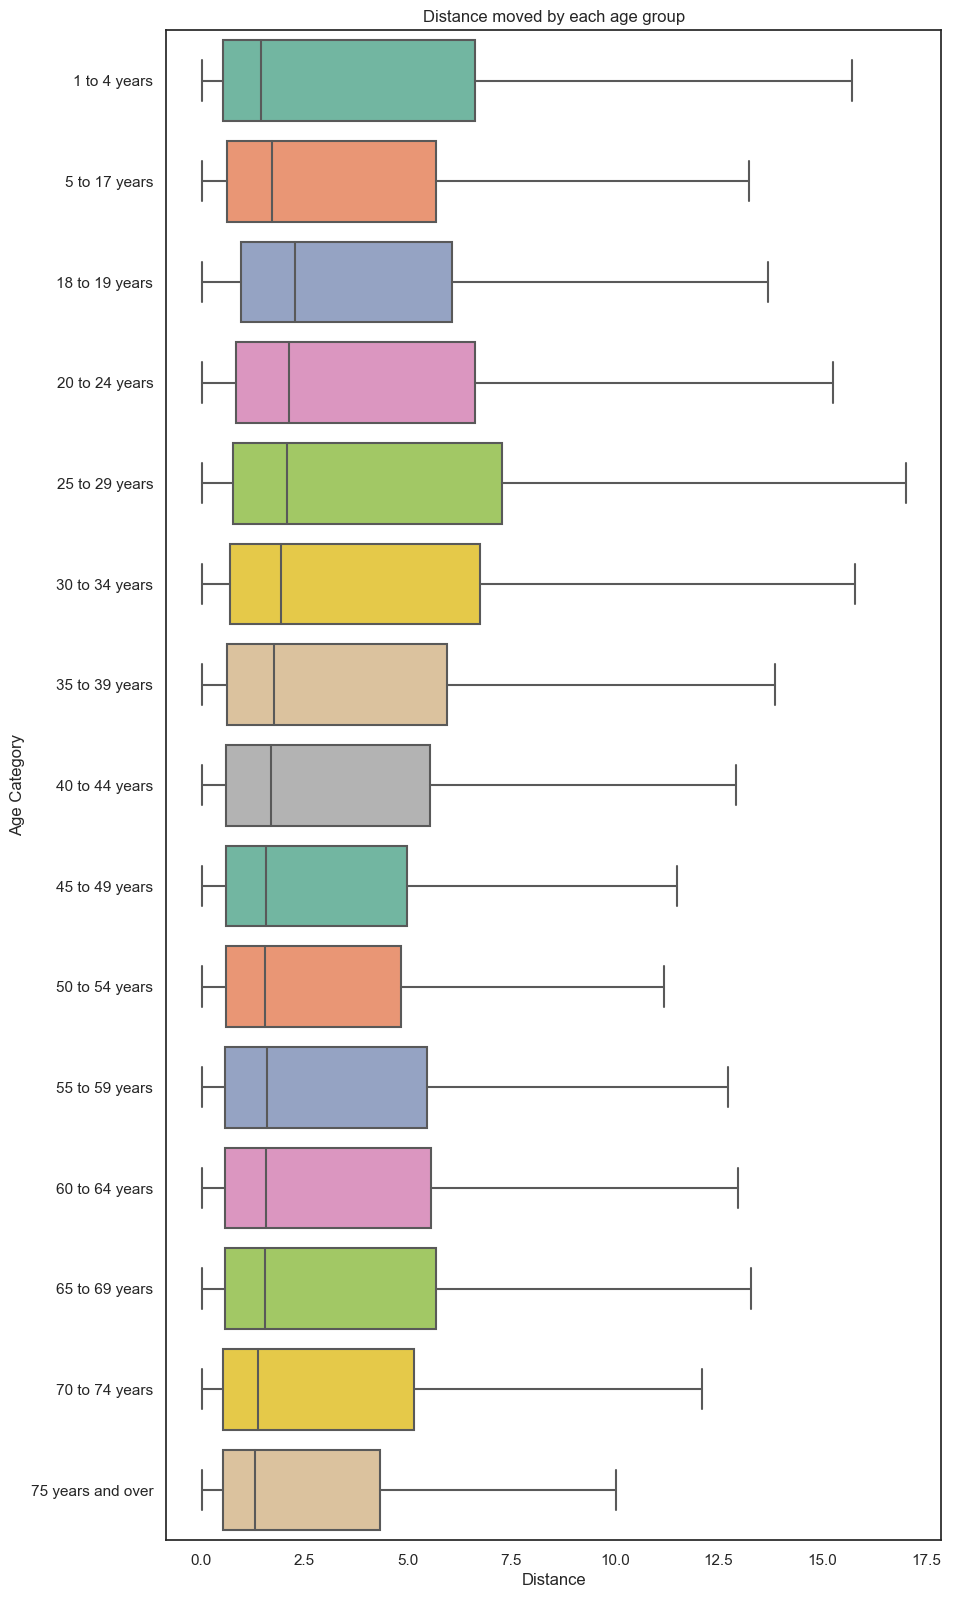

In [157]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'distance',
    y = 'age_cat',
    data = ages_df,
    palette = 'Set2',
    showfliers=False,
    ax = ax,
)
ax.set_title('Distance moved by each age group')
ax.set_ylabel('Age Category')
ax.set_xlabel('Distance')
plt.show()

Outliers were not shown in this plot. The median distance appears very similar between each age group.

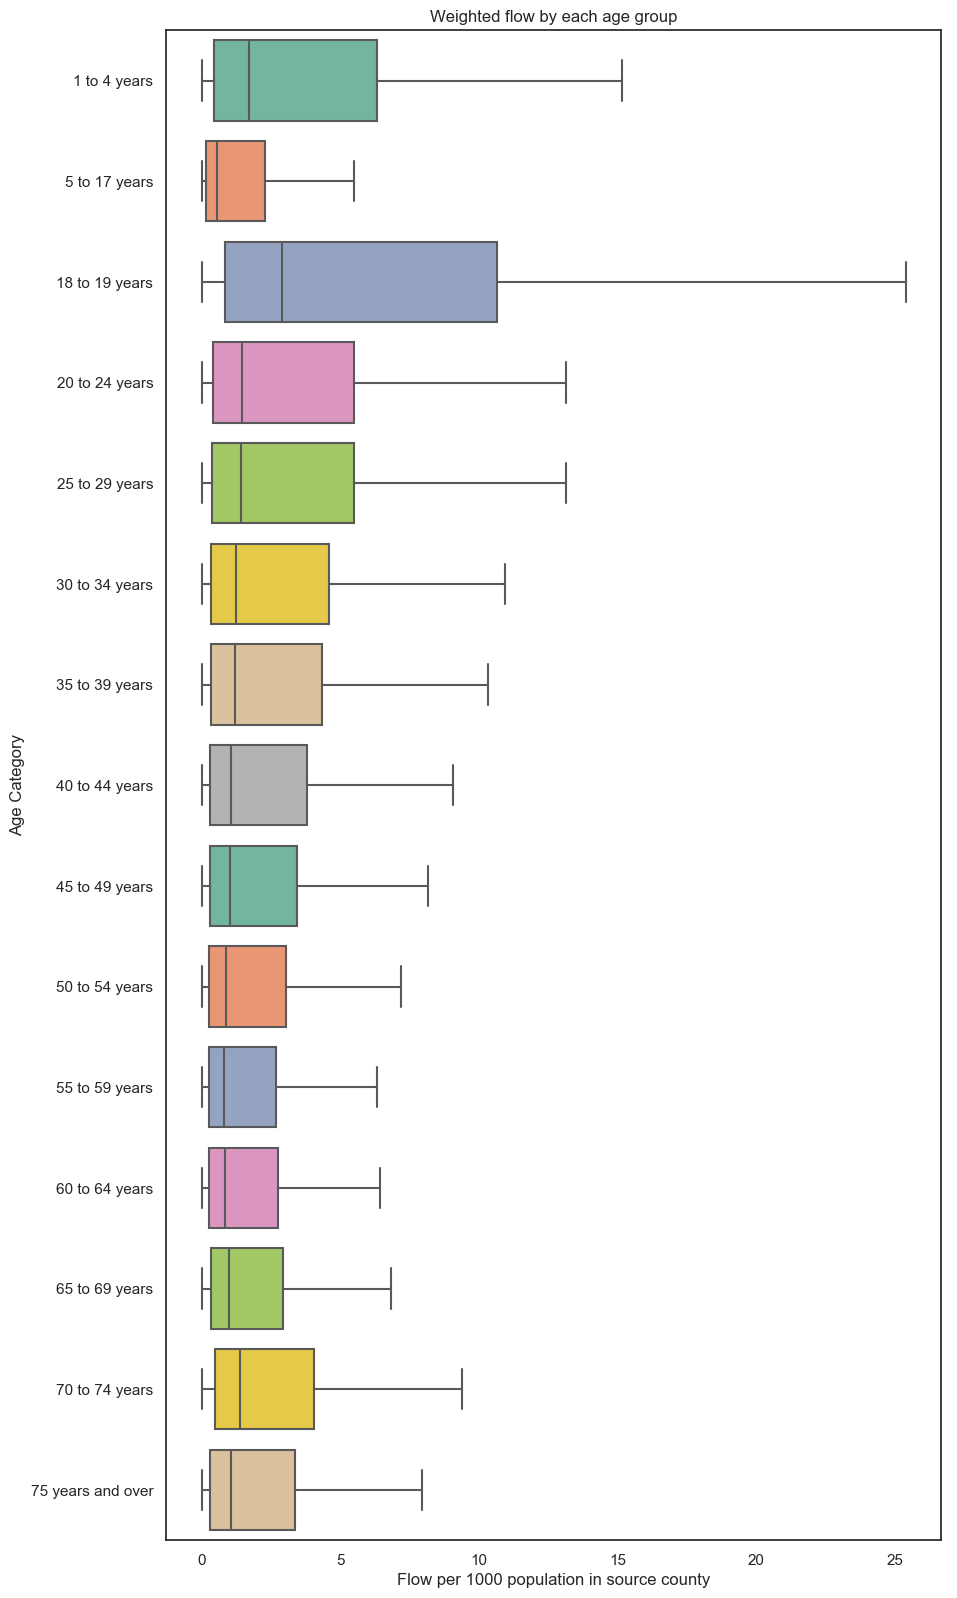

In [161]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'weighted_flow',
    y = 'age_cat',
    data = ages_df,
    palette = 'Set2',
    showfliers=False,
    ax = ax,
)
ax.set_title('Weighted flow by each age group')
ax.set_ylabel('Age Category')
ax.set_xlabel('Flow per 1000 population in source county')
plt.show()

More young people (18-19) are moving from smaller population areas to larger population areas (flow is weighted more).

### Age group movement by state

In [178]:
college_students = ages_df[ (ages_df['age_cat'] == "18 to 19 years")| (ages_df['age_cat'] == "20 to 24 years")]
ordering = college_students.groupby('to_state')['flow'].median().sort_values(ascending=False).index

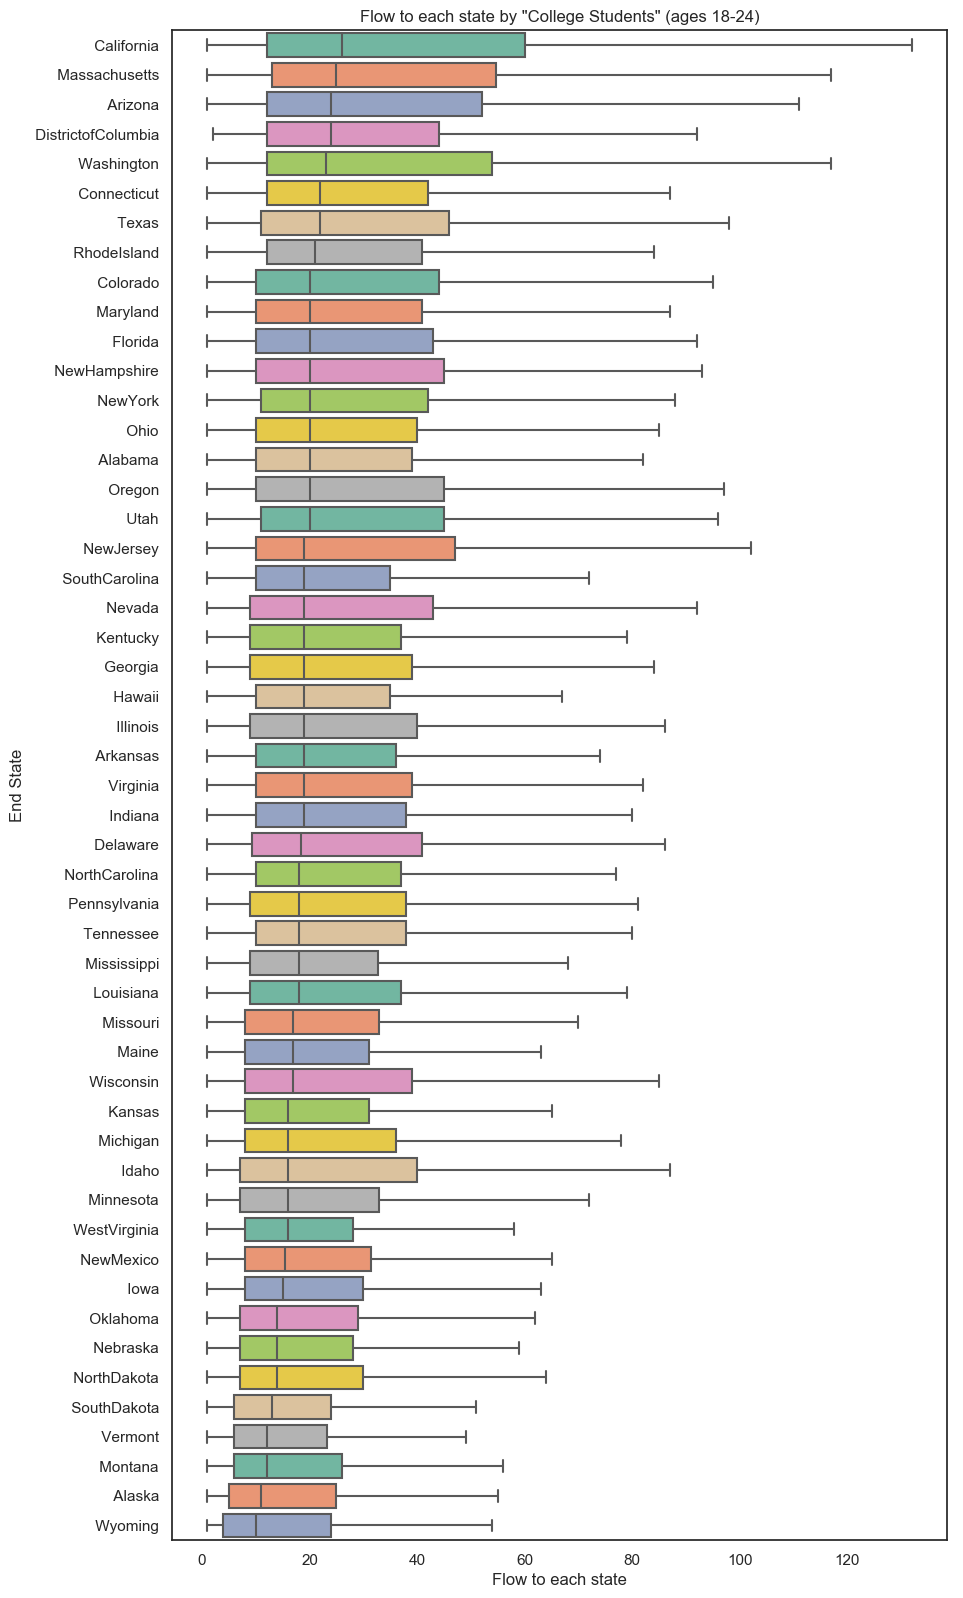

In [179]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'flow',
    y = 'to_state',
    data = college_students,
    palette = 'Set2',
    showfliers=False,
    order = ordering,
    ax = ax,
)
ax.set_title('Flow to each state by "College Students" (ages 18-24)')
ax.set_ylabel('End State')
ax.set_xlabel('Flow to each state')
plt.show()

More college-aged people are moving to California and Massachussetts, which makes sense because lots of universities are there, as well as major cities for recent graduates and other people looking for jobs.

In [180]:
retirees = ages_df[ (ages_df['age_cat'] == "65 to 69 years") | 
                   (ages_df['age_cat'] == "70 to 74 years") | 
                   (ages_df['age_cat'] == "75 years and over")]
ordering = retirees.groupby('to_state')['flow'].median().sort_values(ascending=False).index

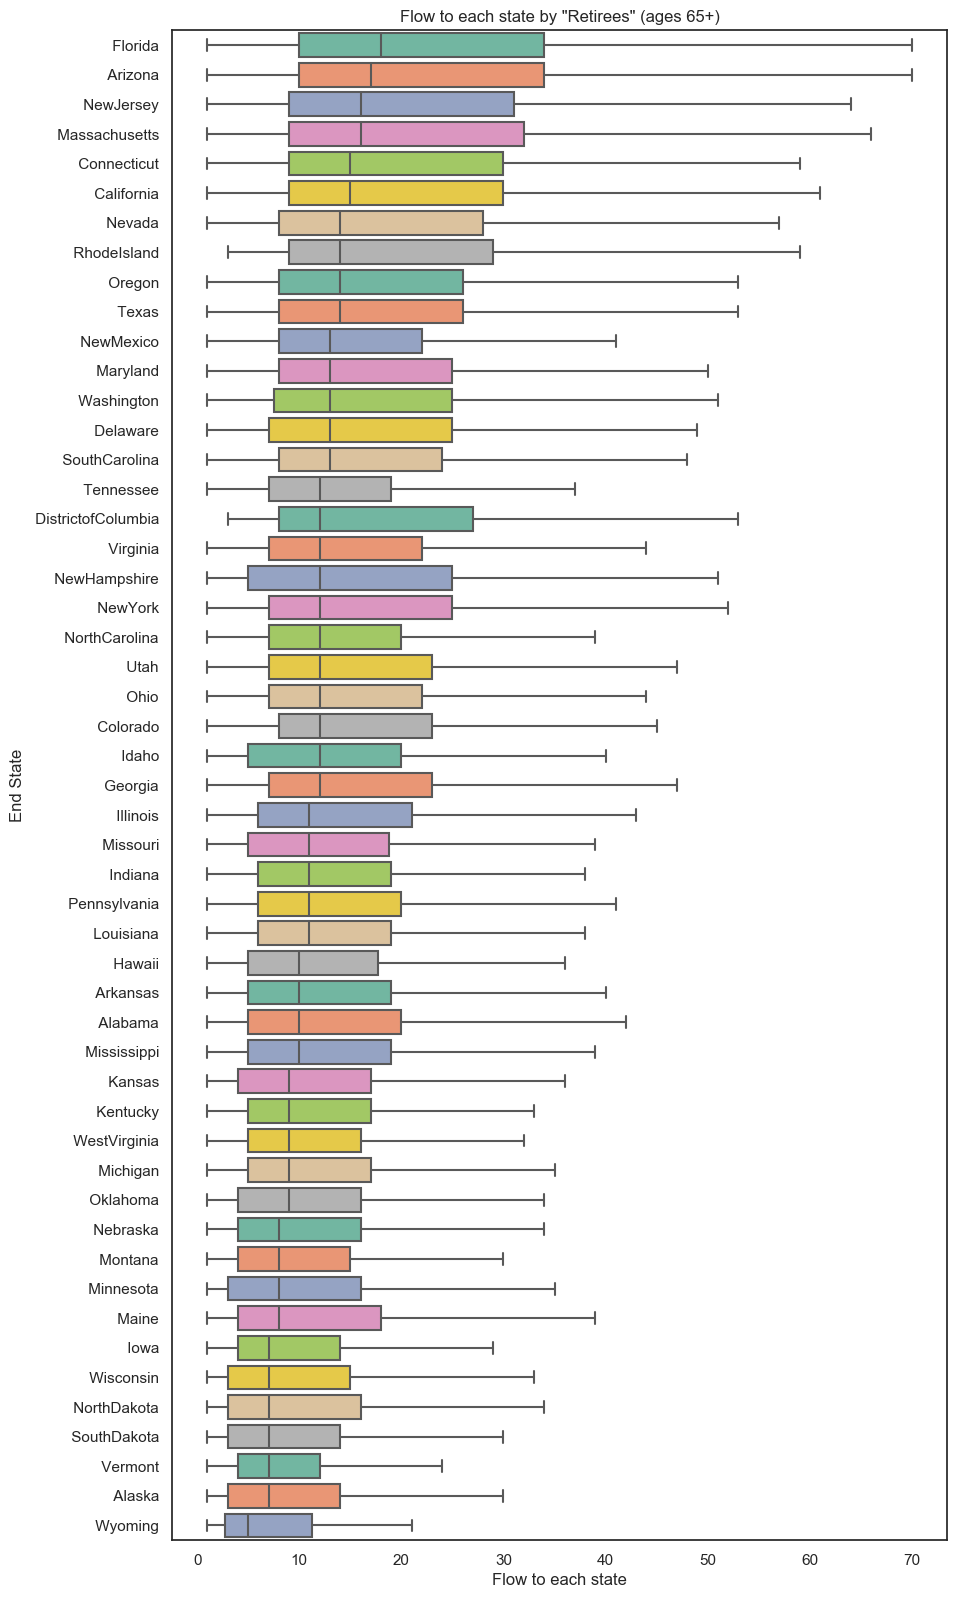

In [181]:
fig, ax = plt.subplots(figsize = [10,20])
sns.boxplot(
    x = 'flow',
    y = 'to_state',
    data = retirees,
    palette = 'Set2',
    showfliers=False,
    order = ordering,
    ax = ax,
)
ax.set_title('Flow to each state by "Retirees" (ages 65+)')
ax.set_ylabel('End State')
ax.set_xlabel('Flow to each state')
plt.show()

As expected, Florida is #1, then Arizona. 

## Flow By Sex

In [164]:
sex_keys = {'01':"Male", '02':"Female"}

### Preprocessing

In [187]:
sex_df = pd.DataFrame()

for agegroup in sex_keys:
    filename = f'Data/by_sex/sex_{agegroup}_edges.txt'
    df = pd.read_csv(filename, delimiter = ';')
    df['sex'] = sex_keys[agegroup]
    sex_df = pd.concat([sex_df, df], axis=0)
    
sex_df = sex_df.drop(columns=['Unnamed: 8'])
sex_df = sex_df[ sex_df[' distance'] < 200]
sex_df = split_county_states(sex_df)

sex_df.head()

,fromFIPS,toFIPS,flow,weightedflow,distance,popdiff,fromname,toname,sex,from_state,from_county,to_state,to_county
0,01003,1001,38,0.405783482477,2.176471,-4.82705248448,"BaldwinCounty, Alabama","AutaugaCounty, Alabama",Male,Alabama,BaldwinCounty,Alabama,AutaugaCounty
1,01051,1001,430,11.2639161755,0.505383,-4.06744284278,"ElmoreCounty, Alabama","AutaugaCounty, Alabama",Male,Alabama,ElmoreCounty,Alabama,AutaugaCounty
2,01081,1001,13,0.184078615729,1.293173,-4.64470440269,"LeeCounty, Alabama","AutaugaCounty, Alabama",Male,Alabama,LeeCounty,Alabama,AutaugaCounty
3,01101,1001,355,3.36368546225,0.552103,-4.89786890949,"MontgomeryCounty, Alabama","AutaugaCounty, Alabama",Male,Alabama,MontgomeryCounty,Alabama,AutaugaCounty
4,01125,1001,27,0.290910658105,1.157563,-4.82162487169,"TuscaloosaCounty, Alabama","AutaugaCounty, Alabama",Male,Alabama,TuscaloosaCounty,Alabama,AutaugaCounty


In [189]:
df = pd.DataFrame()
df['sex'] = sex_df['sex']
df['flow'] = sex_df[' flow']
df['from_state'] = sex_df['from_state']
df['from_county'] = sex_df['from_county']
df['distance'] = sex_df[' distance']
df['to_state'] = sex_df['to_state']
df['to_county'] = sex_df['to_county']
df['weighted_flow'] = sex_df[' weightedflow'].apply(float)
df['popdiff'] = sex_df[' popdiff'].apply(float)
df.head(15)

,sex,flow,from_state,from_county,distance,to_state,to_county,weighted_flow,popdiff
0,Male,38,Alabama,BaldwinCounty,2.176471,Alabama,AutaugaCounty,0.405783,-4.827052
1,Male,430,Alabama,ElmoreCounty,0.505383,Alabama,AutaugaCounty,11.263916,-4.067443
2,Male,13,Alabama,LeeCounty,1.293173,Alabama,AutaugaCounty,0.184079,-4.644704
3,Male,355,Alabama,MontgomeryCounty,0.552103,Alabama,AutaugaCounty,3.363685,-4.897869
4,Male,27,Alabama,TuscaloosaCounty,1.157563,Alabama,AutaugaCounty,0.290911,-4.821625
5,Male,8,Kansas,JohnsonCounty,10.352298,Alabama,AutaugaCounty,0.029553,-5.387762
6,Male,44,Alabama,AutaugaCounty,2.176471,Alabama,BaldwinCounty,1.681058,4.832975
7,Male,18,Alabama,BarbourCounty,2.635507,Alabama,BaldwinCounty,1.275601,4.903828
8,Male,40,Alabama,CalhounCounty,3.658894,Alabama,BaldwinCounty,0.732614,4.598221
9,Male,11,Alabama,ChiltonCounty,2.419984,Alabama,BaldwinCounty,0.512152,4.861946


### Figures

In [196]:
ordering = df.groupby('from_state')['flow'].median().sort_values(ascending=False).index

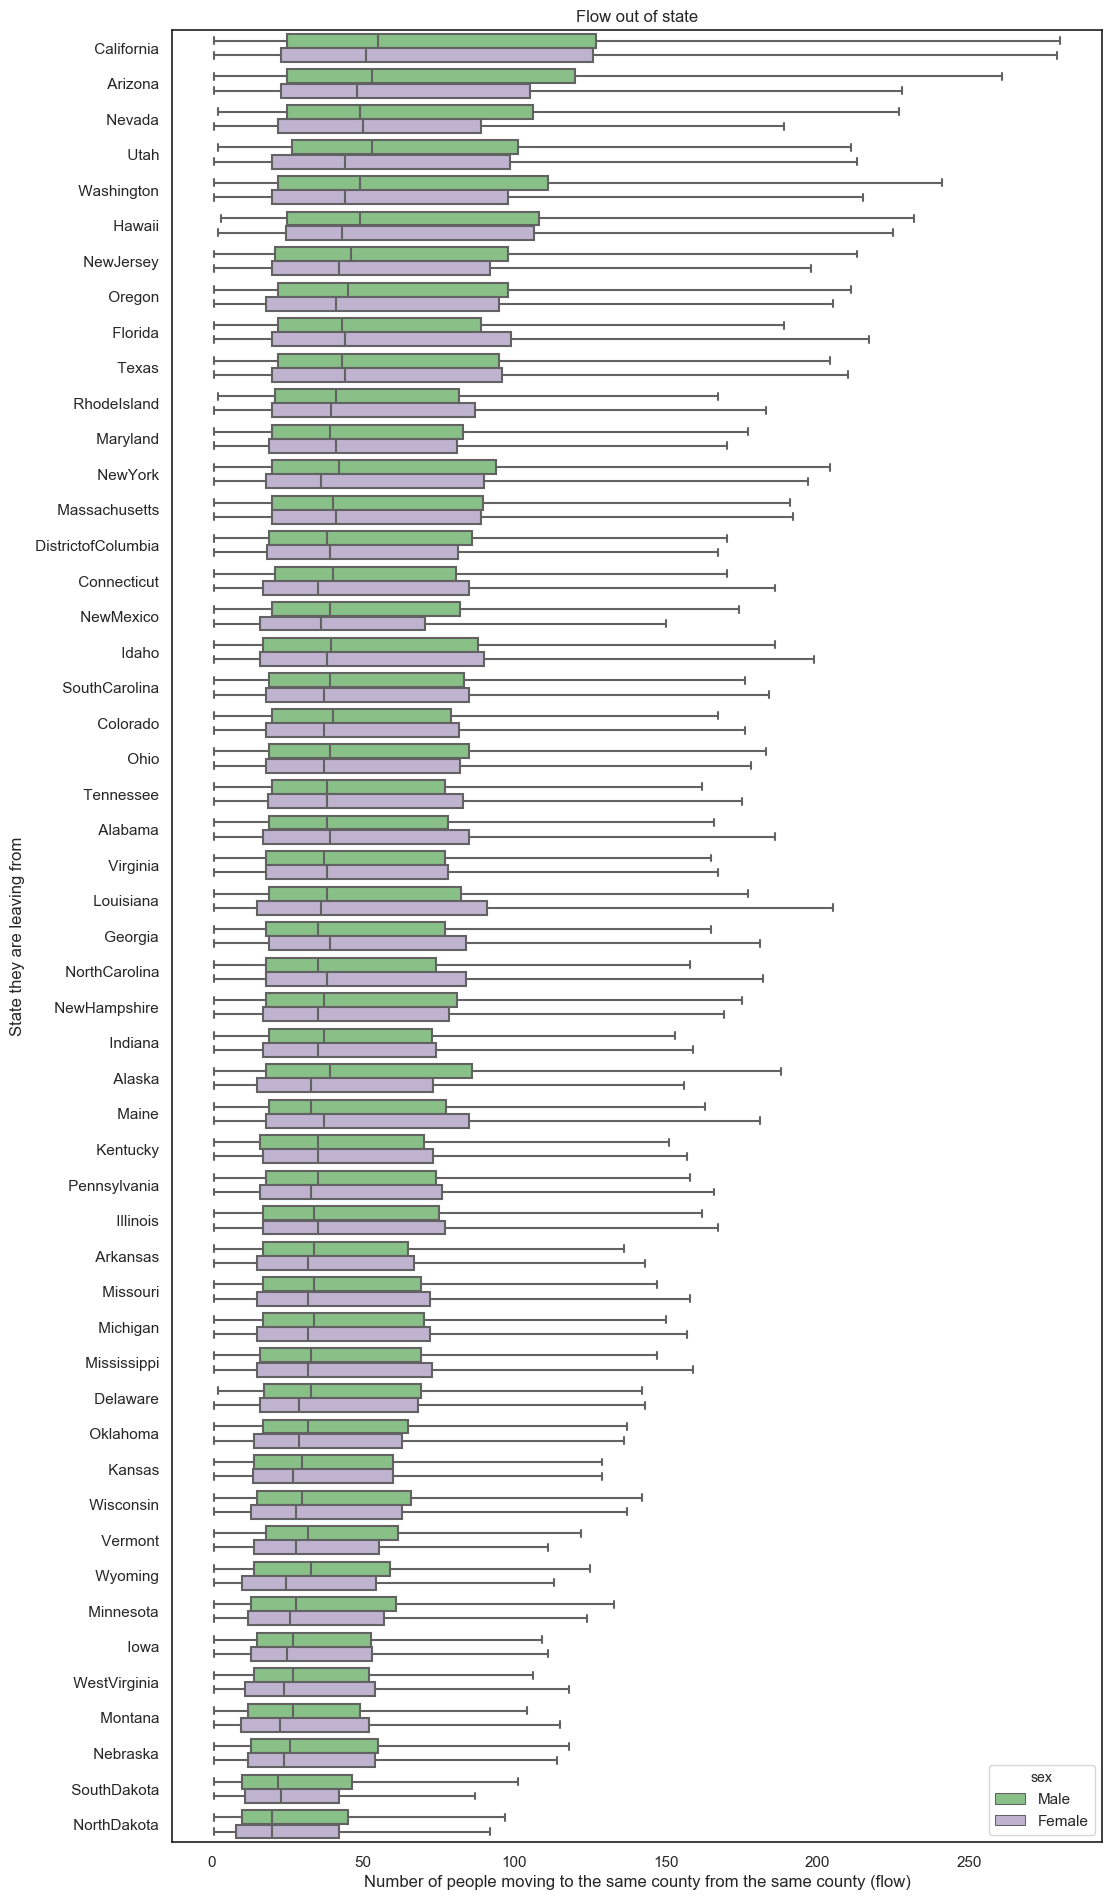

In [202]:
fig, ax = plt.subplots(figsize = [12,24])
sns.boxplot(
    x = 'flow',
    y = 'from_state',
    hue='sex',
    data = df,
    palette = 'Accent',
    order=ordering,
    showfliers=False,
    ax = ax,
)
ax.set_title('Flow out of state')
ax.set_ylabel('State they are leaving from')
ax.set_xlabel('Number of people moving to the same county from the same county (flow)')
plt.show()

It looks as though many states have slightly more male than female flows, but overall they're very close to the same ballpark.

## Flow By Race Group
There are four categories of race in the dataset, "White alone", "Black or African American alone", "Asian alone", "Other race alone or Two or more races". IMO that's not very inclusive, but there could still be some interesting things to see anyways. Because 'hispanic/latino' is an ethnicity and not a race based on political categories, hispanic/latino people may be in any of the categories, and the dataset lists 'hispanic/latino or not hispanic/latino' in a different category not present in my cleaned data.

In [162]:
 race_keys = {
     '01': "White alone", '02':"Black or African American alone", 
     '03':"Asian alone", '04':"Other race alone or Two or more races"
 }

In [223]:
race_df = pd.DataFrame()

for racekey in race_keys:
    filename = f'Data/by_race_cat/race_{racekey}_edges.txt'
    df = pd.read_csv(filename, delimiter = ';')
    df['race_group'] = race_keys[racekey]
    race_df = pd.concat([race_df, df], axis=0)
    
race_df = race_df.drop(columns=['Unnamed: 8'])
race_df = race_df[ race_df[' distance'] < 200]
race_df = split_county_states(race_df)

race_df.head()

,fromFIPS,toFIPS,flow,weightedflow,distance,popdiff,fromname,toname,race_group,from_state,from_county,to_state,to_county
0,01003,1001,54,0.326402321083,2.176471,-5.09057898061,"BaldwinCounty, Alabama","AutaugaCounty, Alabama",White alone,Alabama,BaldwinCounty,Alabama,AutaugaCounty
1,01051,1001,711,11.7476000859,0.505383,-4.26183362058,"ElmoreCounty, Alabama","AutaugaCounty, Alabama",White alone,Alabama,ElmoreCounty,Alabama,AutaugaCounty
2,01081,1001,24,0.238177938768,1.293173,-4.76727463124,"LeeCounty, Alabama","AutaugaCounty, Alabama",White alone,Alabama,LeeCounty,Alabama,AutaugaCounty
3,01101,1001,503,5.76312744188,0.552103,-4.65350194696,"MontgomeryCounty, Alabama","AutaugaCounty, Alabama",White alone,Alabama,MontgomeryCounty,Alabama,AutaugaCounty
4,01125,1001,43,0.340731701519,1.157563,-4.92402070047,"TuscaloosaCounty, Alabama","AutaugaCounty, Alabama",White alone,Alabama,TuscaloosaCounty,Alabama,AutaugaCounty


This set has some '.' weighted flows, so we'll remove those entries.

In [224]:
before = race_df.shape[0]
race_df = race_df[ race_df[' weightedflow'] != ' .' ]
after = race_df.shape[0]
print(f'{before-after} entries removed for having "." weighted flow')

2392 entries removed for having "." weighted flow


In [225]:
df = pd.DataFrame()
df['race_group'] = race_df['race_group']
df['flow'] = race_df[' flow']
df['from_state'] = race_df['from_state']
df['from_county'] = race_df['from_county']
df['distance'] = race_df[' distance']
df['to_state'] = race_df['to_state']
df['to_county'] = race_df['to_county']
df['weighted_flow'] =race_df[' weightedflow'].apply(float)
df['popdiff'] = race_df[' popdiff'].apply(float)
df.head(15)

,race_group,flow,from_state,from_county,distance,to_state,to_county,weighted_flow,popdiff
0,White alone,54,Alabama,BaldwinCounty,2.176471,Alabama,AutaugaCounty,0.326402,-5.090579
1,White alone,711,Alabama,ElmoreCounty,0.505383,Alabama,AutaugaCounty,11.747600,-4.261834
2,White alone,24,Alabama,LeeCounty,1.293173,Alabama,AutaugaCounty,0.238178,-4.767275
3,White alone,503,Alabama,MontgomeryCounty,0.552103,Alabama,AutaugaCounty,5.763127,-4.653502
4,White alone,43,Alabama,TuscaloosaCounty,1.157563,Alabama,AutaugaCounty,0.340732,-4.924021
5,White alone,8,Kansas,JohnsonCounty,10.352298,Alabama,AutaugaCounty,0.016521,-5.645399
6,White alone,84,Alabama,AutaugaCounty,2.176471,Alabama,BaldwinCounty,2.019425,5.097386
7,White alone,12,Alabama,BarbourCounty,2.635507,Alabama,BaldwinCounty,0.954350,5.187969
8,White alone,31,Alabama,CalhounCounty,3.658894,Alabama,BaldwinCounty,0.366591,4.914713
9,White alone,11,Alabama,ChiltonCounty,2.419984,Alabama,BaldwinCounty,0.298321,5.113475


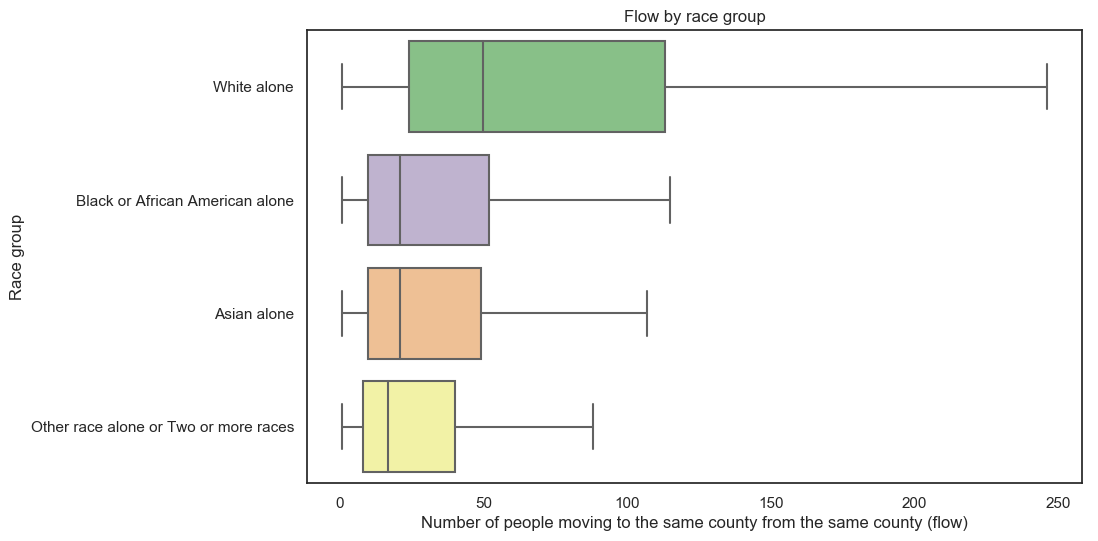

In [233]:
fig, ax = plt.subplots(figsize = [10,6])
sns.boxplot(
    x = 'flow',
    y = 'race_group',
    data = df,
    palette = 'Accent',
    showfliers=False,
    ax = ax,
)
ax.set_title('Flow by race group')
ax.set_ylabel('Race group')
ax.set_xlabel('Number of people moving to the same county from the same county (flow)')
plt.show()

White people are typically moving the most by a fairly large margin. This is likely just based off of there being more white people in a lot of places.

In [228]:
ordering = df.groupby('to_state')['flow'].median().sort_values(ascending=False).index

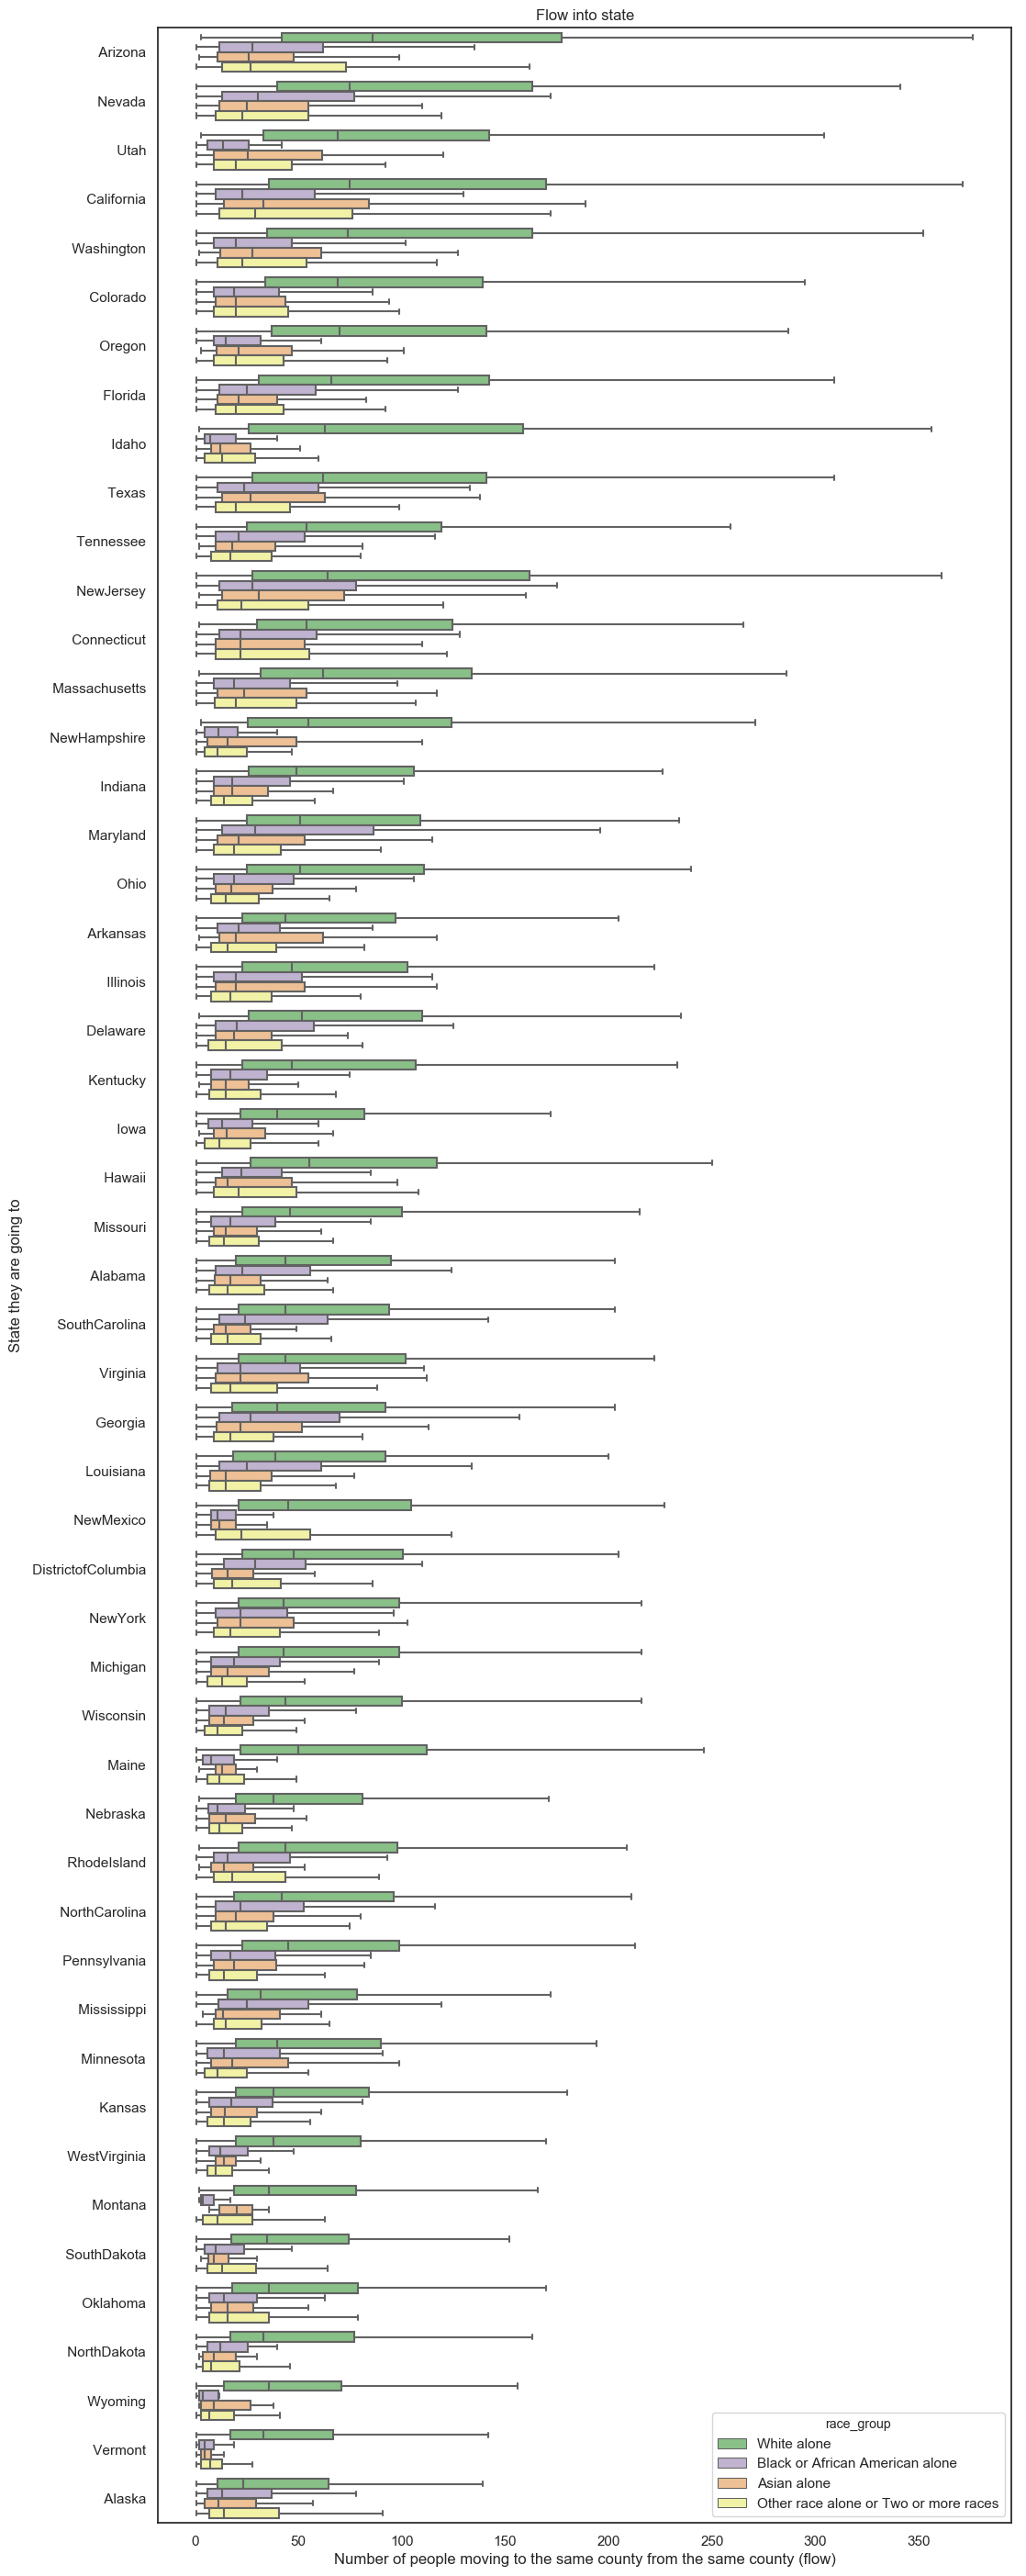

In [229]:
fig, ax = plt.subplots(figsize = [12,36])
sns.boxplot(
    x = 'flow',
    y = 'to_state',
    hue='race_group',
    data = df,
    palette = 'Accent',
    order=ordering,
    showfliers=False,
    ax = ax,
)
ax.set_title('Flow into state')
ax.set_ylabel('State they are going to')
ax.set_xlabel('Number of people moving to the same county from the same county (flow)')
plt.show()

White people having larger flows is consistent across each of the states.

In [243]:
for race_num in race_keys:
    race_group = race_keys[race_num]
    just_one_race = df[ df['race_group'] == race_group]
    ordering = just_one_race.groupby('to_state')['flow'].median().sort_values(ascending=False).index
    print(f'Top Five States moved to by "{race_group}" people:')
    print(np.array(ordering[0:5]))

Top Five States moved to by "White alone" people:
[' Arizona' ' Nevada' ' California' ' Washington' ' Oregon']
Top Five States moved to by "Black or African American alone" people:
[' Nevada' ' Maryland' ' DistrictofColumbia' ' Arizona' ' NewJersey']
Top Five States moved to by "Asian alone" people:
[' California' ' NewJersey' ' Washington' ' Texas' ' Arizona']
Top Five States moved to by "Other race alone or Two or more races" people:
[' California' ' Arizona' ' Washington' ' Nevada' ' NewJersey']


The different race groups had different top places to go.

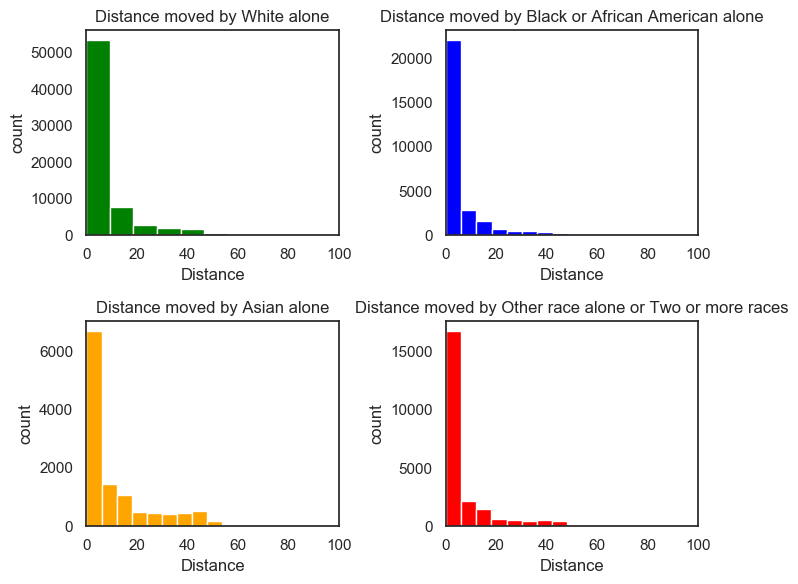

In [260]:
fig, ax = plt.subplots(2,2, figsize = [8,6])

colors = ['green', 'blue', 'orange', 'red']

for race_num in race_keys:
    race_group = race_keys[race_num]
    just_one_race = df[ df['race_group'] == race_group]
    plt.subplot(2,2,int(race_num))
    plt.hist( just_one_race['distance'], bins = 15, color=colors[int(race_num)-1])
    plt.xlim([0, 100])
    plt.xlabel('Distance')
    plt.ylabel('count')
    plt.title(f'Distance moved by {race_group}')
    
plt.tight_layout()


The distance distributions look fairly similar between different the different race groups. 

# Conclusions

A lot of people are moving to the southwest. I made a lot of box plots. The amount of data made it hard to plot a map of the flows, but that would be an interesting next project.